# Ry gate fidelity check

8 Jan 2020

origined by rum

In this code, each of angle of Ry gate are checked own fidelity as how they act.
range: -π ~ π

## Import tools

In [7]:
## Import date, csv tools
from datetime import datetime

## Import pi from numpy module
from numpy import pi
import numpy as np

## Import plot tools
import matplotlib as mpl
import matplotlib.pyplot as plt

## Import qiskit tools
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.visualization import plot_histogram

## import qiskit job monitor
from qiskit.tools.monitor import job_monitor

## import qiskit readout error mitigation tools
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

---
# Get Device

In [8]:
IBMQ.load_account()

/Users/Yasuhiro/anaconda3/lib/python3.7/site-packages/qiskit/providers/models/backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

### Here to choose the provider

In [9]:
## keio-internal device
provider = IBMQ.get_provider(hub='ibm-q-keio', group='keio-internal', project='keio-students')

## reservations
# provider = IBMQ.get_provider(hub='ibm-q-keio', group='keio-internal', project='reservations')

## open device
# provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

---
# Define backend device

To check all qubit, the circuits are repeated $\#$ of device qubits times

In [10]:
angle_div = 36

In [11]:
## define backend device
device = provider.get_backend("ibmq_ourense")

# Get device property

In [6]:
a_day = datetime(2019, 12, 16)
device = provider.backends.ibmq_valencia
prop = device.properties(datetime = a_day)

In [7]:
print('u1 = ')
print(prop._gates['u1'])
print('u2 = ')
print(prop._gates['u2'])
print('u3 = ')
print(prop._gates['u3'])
print('cx = ')
print(prop._gates['cx'])



u1 = 
{(0,): {'gate_error': (0.0, datetime.datetime(2019, 12, 15, 9, 32, 8, tzinfo=datetime.timezone.utc)), 'gate_length': (0.0, datetime.datetime(2019, 12, 15, 10, 16, 45, tzinfo=datetime.timezone.utc))}, (1,): {'gate_error': (0.0, datetime.datetime(2019, 12, 15, 9, 32, 8, tzinfo=datetime.timezone.utc)), 'gate_length': (0.0, datetime.datetime(2019, 12, 15, 10, 16, 45, tzinfo=datetime.timezone.utc))}, (2,): {'gate_error': (0.0, datetime.datetime(2019, 12, 15, 9, 32, 8, tzinfo=datetime.timezone.utc)), 'gate_length': (0.0, datetime.datetime(2019, 12, 15, 10, 16, 45, tzinfo=datetime.timezone.utc))}, (3,): {'gate_error': (0.0, datetime.datetime(2019, 12, 15, 9, 32, 8, tzinfo=datetime.timezone.utc)), 'gate_length': (0.0, datetime.datetime(2019, 12, 15, 10, 16, 45, tzinfo=datetime.timezone.utc))}, (4,): {'gate_error': (0.0, datetime.datetime(2019, 12, 15, 9, 32, 8, tzinfo=datetime.timezone.utc)), 'gate_length': (0.0, datetime.datetime(2019, 12, 15, 10, 16, 45, tzinfo=datetime.timezone.utc))}

In [8]:
_prop_qubits = list(prop._qubits[0].keys())
qubit_props = [{properties:[qubits[properties][0] for qubits in prop._qubits.values()]} for properties in _prop_qubits]

# Compose quantum circuit

In [9]:
## define qubit label as num_qubits
num_qubits = len(device.configuration().gates[0].coupling_map)


## Define the list to store the circuit lists of each qubits of the processor
allqc = []


## repeat circuit definition for each qubits of the processor
for num_q in range(num_qubits):

    ## Define the list to store each angled Ry gate circuits(2pi*0/36~2pi*35/36)
    angleqc = []
    
    ## repeat circuit definition for each angled Ry gate (2pi*0/36~2pi*35/36)
    for angle in range(-18, 19):
        
        ## define circuit
        qr = QuantumRegister(num_qubits, "q")
        cr = ClassicalRegister(num_qubits, "c")
        circuit = QuantumCircuit(qr, cr)
        
        
        ## add Ry gate to circuit
        circuit.ry(2*pi*angle/angle_div, qr[num_q])
        
        ## measure the qubit
        circuit.measure(qr, cr)
        
        
        ## Append the circuit to the angleqc list
        angleqc.append(circuit)
        
    
    ## Append angleqc (the circuit list) of each qubits of the processor
    allqc.append(angleqc)

## Show the circuit example

In [10]:
allqc[1][36].draw()

---
# Run on QASM simulator

In [11]:
## define simulator
simulator = Aer.get_backend("qasm_simulator")

## define shots
shots = 8192

sim_list = []
## repeat # of qubits times
for num_q in range(num_qubits):
    job_sim = execute(allqc[num_q], backend = simulator, shots = shots)
    result_sim = job_sim.result()
    counts = []
    
    ## repeat # of each angle circuits times
    for angle in range(angle_div+1):
        count_sim = result_sim.get_counts(allqc[num_q][angle])
        counts.append(count_sim)
    
    sim_list.append(counts)

### Show the simulator retults

In [12]:
print(sim_list)

[[{'00001': 8192}, {'00000': 68, '00001': 8124}, {'00000': 261, '00001': 7931}, {'00000': 561, '00001': 7631}, {'00000': 995, '00001': 7197}, {'00000': 1386, '00001': 6806}, {'00000': 2070, '00001': 6122}, {'00000': 2669, '00001': 5523}, {'00000': 3347, '00001': 4845}, {'00000': 4093, '00001': 4099}, {'00000': 4743, '00001': 3449}, {'00000': 5469, '00001': 2723}, {'00000': 6169, '00001': 2023}, {'00000': 6665, '00001': 1527}, {'00000': 7216, '00001': 976}, {'00000': 7617, '00001': 575}, {'00000': 7930, '00001': 262}, {'00000': 8117, '00001': 75}, {'00000': 8192}, {'00000': 8124, '00001': 68}, {'00000': 7903, '00001': 289}, {'00000': 7627, '00001': 565}, {'00000': 7266, '00001': 926}, {'00000': 6720, '00001': 1472}, {'00000': 6148, '00001': 2044}, {'00000': 5471, '00001': 2721}, {'00000': 4745, '00001': 3447}, {'00000': 4076, '00001': 4116}, {'00000': 3343, '00001': 4849}, {'00000': 2693, '00001': 5499}, {'00000': 2072, '00001': 6120}, {'00000': 1445, '00001': 6747}, {'00000': 996, '000

### Plot the simulator result

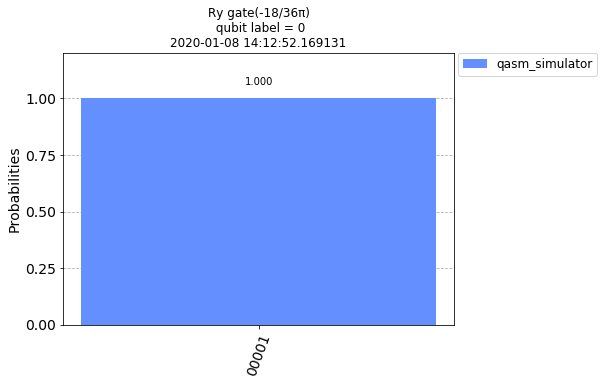

In [13]:
## define which circuit results
qubit = 0
angle = -18

## plot the results
plot_histogram(sim_list[qubit][angle+18], 
               legend=[simulator], 
               title="Ry gate("+str(angle)+"/36π)\n qubit label = "
               +str(qubit)
               +"\n"+str(datetime.today()))

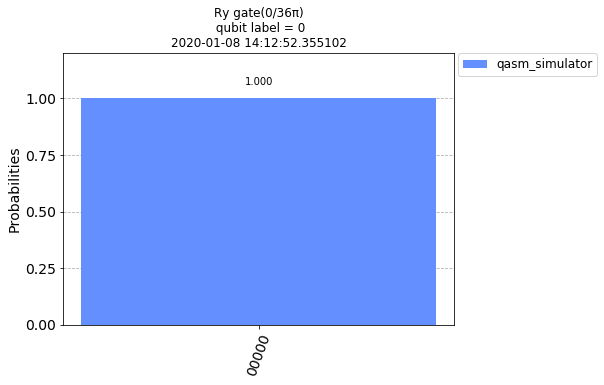

In [14]:
## define which circuit results
qubit = 0
angle = 0

## plot the results
plot_histogram(sim_list[qubit][angle+18], 
               legend=[simulator], 
               title="Ry gate("+str(angle)+"/36π)\n qubit label = "
               +str(qubit)
               +"\n"+str(datetime.today()))

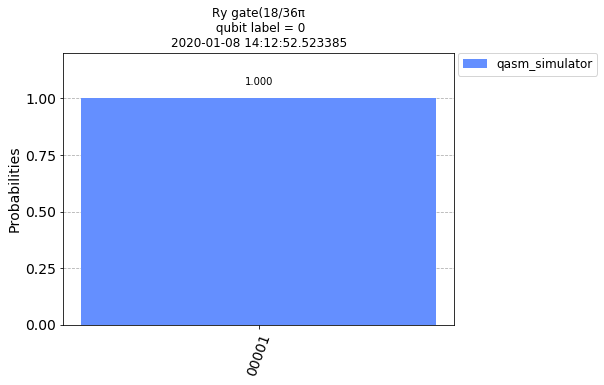

In [15]:
## define which circuit results
qubit = 0
angle = 18

## plot the results
plot_histogram(sim_list[qubit][angle+18], 
               legend=[simulator], 
               title="Ry gate("+str(angle)+"/36π\n qubit label = "
               +str(qubit)
               +"\n"+str(datetime.today()))

---
# Run on Real device

##  Define mitigation circuit

In [16]:
qr = QuantumRegister(num_qubits)
meas_calibs, state_labels = complete_meas_cal(qr=qr, circlabel='mcal')

In [17]:
print(meas_calibs)
print(state_labels)

[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1a22b6bbe0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1a22b6bc88>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1a22b6be48>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1a22b75080>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1a22b75278>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1a22b754a8>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1a22b757b8>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1a22b759e8>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1a22b75c18>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1a22b75e80>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1a22c6e0b8>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1a22c6e2e8>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1a22c6e518>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1a22c6e780>, <qisk

## Execution

In [18]:
# ## define shots
# shots = 8192

# job_id_list = []
# cal_job_id_list = []
# ## repeat # of qubits times
# for num_q in range(num_qubits):
    
#     ## job for Ry circuit
#     job_exp = execute(allqc[num_q], 
#                       backend = device, 
#                       shots = shots, 
#                      optimization_level = 0
#                      )
#     job_id_list.append(job_exp.job_id())
    
#     ## job for meas_cal
#     cal_job = execute(meas_calibs, 
#                   backend=device, 
#                   shots=shots, 
#                   optimization_level=0
#                  )
#     cal_job_id_list.append(cal_job.job_id())
    
# print('job_id_list = ', job_id_list)
# print('cal_job_id_list = ', cal_job_id_list)

job_id_list =  ['5e1564d617a77000188a122a', '5e1564e485a7c400191afd87', '5e1564eb85a7c400191afd88', '5e1564f16baf6a0018c1e61e', '5e1564f7a7bf4900184fe159']
cal_job_id_list =  ['5e1564dfa7bf4900184fe154', '5e1564e788e90c00188e6995', '5e1564ee17a77000188a122b', '5e1564f4fa00cc0018fd18c7', '5e1564f985a7c400191afd8b']


In [19]:
job_id_list =  ['5e1564d617a77000188a122a', '5e1564e485a7c400191afd87', '5e1564eb85a7c400191afd88', '5e1564f16baf6a0018c1e61e', '5e1564f7a7bf4900184fe159']
cal_job_id_list =  ['5e1564dfa7bf4900184fe154', '5e1564e788e90c00188e6995', '5e1564ee17a77000188a122b', '5e1564f4fa00cc0018fd18c7', '5e1564f985a7c400191afd8b']

In [20]:
# writeout = open('ourense_job_id_list.tex', 'w')

# writeout.write('job_id_list = [')
# for job_id in job_id_list:
#     writeout.write('"')
#     writeout.writelines(job_id)
#     writeout.write('",')
# writeout.write(']\n')

# writeout.write('cal_job_id_list = [')
# for job_id in cal_job_id_list:
#     writeout.write('"')
#     writeout.writelines(job_id)
#     writeout.write('",')
# writeout.write(']')

# writeout.close()

## retrieve the job and get the result

In [21]:
## Define the list to store the result_exp for error mitigation
result_exp_list = []
result_cal_exp_list = []


for job_id, cal_job_id in zip(job_id_list,cal_job_id_list) :
    ## retrieve jobs
    retrieved_job = device.retrieve_job(job_id)
    retrieved_cal_job = device.retrieve_job(cal_job_id)
    print("jobs were retrieved")
    result_exp = retrieved_job.result()
    print("got exp result")
    result_cal_exp = retrieved_cal_job.result()
    print("got cal_exp result")
    ## Append results_exp to the result_exp_list for error mitigation operation
    result_exp_list.append(result_exp)
    result_cal_exp_list.append(result_cal_exp)

print(result_exp_list)
print(result_cal_exp_list)

jobs were retrieved
got exp result
got cal_exp result
jobs were retrieved
got exp result
got cal_exp result
jobs were retrieved
got exp result
got cal_exp result
jobs were retrieved
got exp result
got cal_exp result
jobs were retrieved
got exp result
got cal_exp result
[Result(backend_name='ibmq_valencia', backend_version='1.0.3', date=datetime.datetime(2020, 1, 8, 5, 16, 4, tzinfo=datetime.timezone.utc), execution_id='8e86ba06-31d5-11ea-be8a-ac1f6b47c318', header=Obj(backend_name='ibmq_valencia', backend_version='1.0.3'), job_id='5e1564d617a77000188a122a', qobj_id='3cc260fb-292f-49b4-b14e-0546aedc7386', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=590, 0x1=7211, 0x10=12, 0x11=117, 0x13=1, 0x18=1, 0x19=1, 0x2=14, 0x3=58, 0x4=6, 0x5=68, 0x7=3, 0x8=8, 0x9=95, 0xb=3, 0xd=4)), header=Obj(clbit_labels=[['c', 0], ['c', 1], ['c', 2], ['c', 3], ['c', 4]], creg_sizes=[['c', 5]], memory_slots=5, n_qubits=5, name='circuit0', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q

In [22]:
## Define the list to store the count_exp
exp_list = []

for result_exp in result_exp_list:
    counts = []
    
    ## repeat # of each angle circuits times
    for angle in range(angle_div+1):
        count_exp = result_exp.get_counts(angle)
        counts.append(count_exp)

    exp_list.append(counts)

### Show the realdevice results

In [23]:
print(exp_list)

[[{'10000': 12, '00101': 68, '00111': 3, '01001': 95, '00001': 7211, '10001': 117, '11001': 1, '00011': 58, '11000': 1, '01101': 4, '00100': 6, '00000': 590, '01011': 3, '10011': 1, '00010': 14, '01000': 8}, {'10000': 10, '00101': 66, '00111': 1, '01001': 78, '01101': 1, '00100': 3, '00000': 558, '01011': 3, '00001': 7282, '00010': 5, '01000': 7, '10001': 111, '00011': 67}, {'10000': 12, '10101': 2, '11011': 1, '00101': 48, '01001': 79, '00100': 4, '00000': 608, '01011': 1, '10011': 1, '00001': 7238, '00010': 4, '01000': 3, '10001': 136, '11001': 1, '00011': 54}, {'10000': 19, '00101': 74, '00111': 2, '01001': 72, '01101': 1, '00100': 4, '00000': 767, '01011': 3, '00001': 7069, '00010': 12, '01000': 10, '10001': 112, '11001': 2, '00011': 45}, {'10000': 19, '10101': 2, '00101': 52, '01001': 89, '01101': 3, '00100': 10, '00000': 1004, '10011': 1, '00001': 6816, '00010': 12, '01000': 15, '10001': 114, '11001': 1, '00011': 54}, {'10000': 24, '00101': 45, '01001': 75, '01101': 1, '00100': 1

In [ ]:
exp_list = [[{'10000': 12, '00101': 68, '00111': 3, '01001': 95, '00001': 7211, '10001': 117, '11001': 1, '00011': 58, '11000': 1, '01101': 4, '00100': 6, '00000': 590, '01011': 3, '10011': 1, '00010': 14, '01000': 8}, {'10000': 10, '00101': 66, '00111': 1, '01001': 78, '01101': 1, '00100': 3, '00000': 558, '01011': 3, '00001': 7282, '00010': 5, '01000': 7, '10001': 111, '00011': 67}, {'10000': 12, '10101': 2, '11011': 1, '00101': 48, '01001': 79, '00100': 4, '00000': 608, '01011': 1, '10011': 1, '00001': 7238, '00010': 4, '01000': 3, '10001': 136, '11001': 1, '00011': 54}, {'10000': 19, '00101': 74, '00111': 2, '01001': 72, '01101': 1, '00100': 4, '00000': 767, '01011': 3, '00001': 7069, '00010': 12, '01000': 10, '10001': 112, '11001': 2, '00011': 45}, {'10000': 19, '10101': 2, '00101': 52, '01001': 89, '01101': 3, '00100': 10, '00000': 1004, '10011': 1, '00001': 6816, '00010': 12, '01000': 15, '10001': 114, '11001': 1, '00011': 54}, {'10000': 24, '00101': 45, '01001': 75, '01101': 1, '00100': 13, '00000': 1454, '10111': 1, '10010': 1, '00001': 6380, '00010': 7, '01000': 19, '10001': 118, '11001': 1, '00011': 53}, {'10000': 32, '00101': 61, '00111': 3, '01001': 73, '01101': 1, '00100': 22, '00000': 1859, '01011': 2, '00011': 44, '00001': 5963, '00010': 10, '01000': 17, '10001': 104, '01100': 1}, {'10000': 32, '00101': 47, '00111': 3, '01001': 75, '00001': 5492, '10001': 97, '11001': 2, '00011': 54, '01101': 1, '00100': 21, '00000': 2315, '10100': 1, '10011': 1, '00010': 18, '01000': 32, '00110': 1}, {'10000': 45, '10101': 3, '00101': 36, '01001': 59, '00001': 4867, '10001': 89, '00011': 38, '01100': 1, '11000': 1, '00100': 27, '00000': 2948, '10100': 1, '01011': 4, '10011': 1, '00010': 23, '01000': 49}, {'10000': 49, '10101': 2, '00101': 32, '01001': 56, '00100': 26, '00000': 3602, '10100': 2, '00011': 32, '00001': 4252, '00010': 26, '01000': 47, '10001': 63, '11001': 1, '01111': 1, '01100': 1}, {'10000': 63, '00101': 35, '01001': 50, '01010': 2, '10010': 1, '00001': 3572, '10001': 56, '11001': 2, '00011': 35, '11000': 1, '01101': 1, '00100': 30, '00000': 4262, '11100': 1, '01011': 1, '10011': 2, '00010': 29, '01000': 49}, {'10000': 78, '00101': 21, '00111': 1, '01001': 51, '01010': 1, '10010': 2, '00001': 2935, '10001': 44, '00011': 28, '01100': 1, '11000': 1, '00100': 35, '00000': 4894, '10100': 1, '00010': 24, '01000': 73, '00110': 2}, {'10000': 93, '00101': 20, '00111': 1, '01001': 30, '10001': 43, '00100': 31, '00000': 5457, '10100': 1, '00011': 18, '00001': 2394, '00010': 26, '01000': 74, '00110': 1, '11001': 1, '01100': 2}, {'10000': 96, '00101': 15, '01001': 23, '01010': 1, '10010': 2, '00001': 1883, '10001': 27, '00011': 19, '01100': 1, '11000': 1, '00100': 49, '00000': 5970, '10100': 1, '00010': 32, '01000': 71, '00110': 1}, {'10000': 111, '00101': 9, '01001': 15, '10001': 21, '00100': 66, '00000': 6453, '01010': 2, '10010': 1, '00001': 1359, '00010': 43, '01000': 84, '00110': 3, '11001': 1, '00011': 20, '11000': 4}, {'10000': 125, '00101': 10, '01001': 12, '00100': 54, '00000': 6950, '10010': 1, '00001': 896, '00010': 43, '01000': 76, '10001': 9, '00011': 15, '11000': 1}, {'10000': 121, '10101': 1, '00101': 6, '01001': 7, '00100': 61, '00000': 7306, '00011': 11, '00001': 544, '00010': 39, '01000': 86, '10001': 7, '01100': 1, '11000': 2}, {'10000': 123, '00101': 3, '01001': 2, '00100': 42, '00000': 7604, '00011': 5, '00001': 292, '00010': 42, '01000': 69, '10001': 7, '01100': 1, '11000': 2}, {'10000': 114, '01001': 5, '10001': 1, '00100': 67, '00000': 7667, '10100': 3, '01010': 2, '00011': 2, '00001': 173, '00010': 50, '01000': 102, '00110': 1, '01100': 1, '11000': 4}, {'10000': 141, '00101': 3, '00100': 75, '00000': 7694, '10100': 2, '10010': 2, '00001': 106, '00010': 51, '01000': 115, '10001': 2, '11000': 1}, {'10000': 134, '00101': 3, '01001': 4, '00100': 72, '00000': 7642, '00011': 3, '10011': 1, '10010': 1, '00001': 171, '00010': 38, '01000': 118, '10001': 2, '01100': 1, '11000': 2}, {'10000': 131, '00101': 5, '01001': 2, '10001': 5, '00100': 52, '00000': 7497, '10100': 1, '00001': 361, '00010': 54, '01000': 78, '00110': 1, '00011': 5}, {'10000': 118, '10101': 1, '00101': 7, '01001': 10, '10001': 11, '00100': 61, '00000': 7263, '10010': 2, '00001': 594, '00010': 45, '01000': 71, '00110': 1, '00011': 7, '11000': 1}, {'10000': 133, '00101': 10, '01001': 13, '10001': 22, '00100': 45, '00000': 6805, '01010': 1, '10011': 1, '10010': 1, '00001': 1032, '00010': 35, '01000': 85, '00110': 1, '00011': 6, '11000': 2}, {'10000': 116, '00101': 10, '01001': 26, '10010': 2, '00001': 1457, '10001': 24, '11001': 1, '00011': 8, '11000': 1, '00100': 64, '00000': 6340, '10100': 3, '01011': 1, '00010': 51, '01000': 84, '00110': 4}, {'10000': 92, '00101': 18, '01001': 22, '01101': 1, '00100': 62, '00000': 5835, '10011': 1, '00001': 1999, '00010': 39, '01000': 78, '10001': 32, '00011': 12, '11000': 1}, {'10000': 80, '00101': 22, '01001': 25, '00100': 58, '00000': 5356, '10100': 1, '01010': 1, '00011': 18, '10010': 1, '00001': 2497, '00010': 41, '01000': 58, '10001': 32, '11001': 1, '01100': 1}, {'10000': 65, '00101': 23, '01001': 42, '10001': 52, '00100': 36, '00000': 4635, '00011': 21, '00001': 3221, '00010': 30, '01000': 62, '00110': 1, '11001': 2, '01100': 2}, {'10000': 68, '00101': 37, '01001': 48, '01010': 1, '10010': 3, '00001': 3738, '10001': 58, '11001': 1, '00011': 19, '11000': 2, '00100': 26, '00000': 4115, '10100': 1, '01011': 1, '00010': 23, '01000': 50, '00110': 1}, {'10000': 50, '00101': 43, '00111': 1, '01001': 59, '10001': 69, '00100': 23, '00000': 3484, '01010': 1, '00001': 4358, '00010': 30, '01000': 48, '00110': 1, '00011': 25}, {'10000': 47, '00101': 49, '00111': 1, '01001': 53, '00100': 18, '00000': 2908, '01011': 1, '00001': 4940, '00010': 22, '01000': 37, '10001': 89, '11001': 1, '00011': 26}, {'10000': 28, '10101': 1, '00101': 32, '00111': 1, '01001': 72, '10111': 1, '10010': 1, '00001': 5541, '10001': 74, '11001': 2, '00011': 41, '01101': 1, '00100': 20, '00000': 2327, '10011': 1, '00010': 21, '01000': 28}, {'10000': 36, '00101': 53, '00111': 1, '01001': 89, '00100': 10, '00000': 1781, '00001': 6008, '00010': 21, '01000': 26, '10001': 124, '00011': 43}, {'10000': 23, '00101': 56, '00111': 1, '01001': 88, '01101': 1, '00100': 14, '00000': 1295, '00001': 6490, '00010': 10, '01000': 15, '10001': 136, '11001': 1, '00011': 62}, {'10000': 14, '00101': 43, '01001': 84, '00100': 8, '00000': 994, '01011': 1, '10011': 1, '00001': 6878, '00010': 12, '01000': 10, '10001': 102, '11001': 2, '00011': 42, '11000': 1}, {'10000': 14, '00101': 60, '01001': 90, '01101': 1, '00100': 8, '00000': 688, '00001': 7146, '00010': 2, '01000': 8, '10001': 119, '01111': 1, '00011': 55}, {'10000': 8, '10101': 1, '00101': 62, '01001': 101, '01101': 1, '00100': 2, '00000': 587, '01011': 1, '00001': 7247, '00010': 10, '01000': 5, '10001': 122, '11001': 2, '00011': 43}], [{'10000': 10, '00111': 3, '01001': 1, '01010': 86, '10111': 1, '01110': 1, '10010': 133, '00001': 19, '00011': 143, '11000': 2, '00100': 8, '00000': 706, '11010': 1, '10011': 3, '01011': 2, '10110': 1, '00010': 6994, '01000': 12, '00110': 66}, {'10000': 9, '00111': 4, '01010': 87, '10010': 108, '00001': 11, '10001': 1, '00011': 131, '11000': 1, '11011': 1, '00100': 7, '00000': 716, '01011': 1, '10011': 4, '00010': 7043, '01000': 5, '00110': 63}, {'10000': 14, '00101': 1, '00111': 1, '01010': 78, '10111': 1, '10010': 119, '00001': 20, '10001': 2, '00011': 154, '00100': 11, '00000': 876, '11010': 2, '10011': 4, '01011': 2, '10110': 2, '00010': 6840, '01000': 15, '00110': 50}, {'10000': 18, '10101': 1, '00111': 3, '01010': 60, '01110': 1, '10010': 100, '00001': 18, '00011': 116, '01100': 1, '11000': 1, '00100': 12, '00000': 1173, '11010': 2, '10011': 2, '00010': 6611, '01000': 16, '00110': 57}, {'10000': 32, '00111': 2, '00100': 20, '00000': 1411, '10100': 1, '11010': 1, '01010': 81, '10010': 127, '00001': 42, '01011': 1, '10110': 1, '00010': 6263, '01000': 29, '00110': 63, '00011': 118}, {'10000': 27, '00101': 1, '00111': 2, '01010': 81, '10010': 89, '00001': 42, '10001': 1, '00011': 100, '00100': 19, '00000': 1906, '10100': 1, '01011': 6, '10011': 2, '00010': 5843, '01000': 24, '00110': 48}, {'10000': 38, '00101': 1, '01010': 54, '01110': 1, '10010': 83, '00001': 46, '10001': 1, '00011': 96, '01100': 1, '00100': 27, '00000': 2304, '10100': 1, '01011': 1, '10110': 1, '00010': 5457, '01000': 34, '00110': 46}, {'10000': 50, '00101': 1, '00111': 1, '01001': 1, '01010': 59, '01110': 1, '10010': 85, '00001': 73, '10001': 3, '00011': 81, '01100': 1, '11000': 2, '00100': 30, '00000': 2899, '11010': 2, '10011': 1, '10110': 1, '00010': 4834, '01000': 33, '00110': 34}, {'10000': 61, '00101': 2, '00111': 1, '01010': 50, '01110': 1, '10010': 62, '00001': 66, '10001': 2, '00011': 71, '01100': 3, '00100': 37, '00000': 3494, '11010': 1, '10011': 4, '01011': 2, '00010': 4261, '01000': 33, '00110': 41}, {'10000': 64, '00111': 1, '01001': 2, '01010': 44, '01110': 2, '10010': 61, '00001': 75, '10001': 1, '00011': 58, '00100': 31, '00000': 4049, '11010': 1, '10011': 2, '01011': 1, '00010': 3713, '01000': 56, '00110': 31}, {'10000': 89, '00101': 1, '01001': 3, '01010': 40, '01110': 1, '10010': 48, '00001': 97, '10001': 2, '00011': 51, '01100': 1, '01101': 1, '00100': 41, '00000': 4659, '01011': 2, '00010': 3086, '01000': 52, '00110': 18}, {'10000': 89, '00101': 1, '01001': 1, '10001': 5, '00100': 51, '00000': 5241, '01010': 29, '11010': 1, '10010': 47, '00001': 104, '00010': 2510, '01000': 53, '00110': 30, '00011': 27, '11000': 3}, {'10000': 83, '00101': 2, '01001': 1, '01010': 18, '01110': 1, '10010': 39, '00001': 125, '10001': 2, '00011': 29, '01100': 1, '11000': 2, '00100': 62, '00000': 5773, '01011': 1, '00010': 1951, '01000': 83, '00110': 19}, {'10000': 93, '00101': 3, '00111': 1, '00100': 57, '00000': 6323, '10100': 3, '11010': 1, '01010': 10, '10010': 20, '00001': 109, '01100': 1, '00010': 1470, '01000': 68, '00110': 7, '00011': 26}, {'10000': 117, '00101': 2, '01001': 1, '10001': 3, '00100': 75, '00000': 6770, '01010': 7, '10010': 11, '00001': 122, '00010': 983, '01000': 66, '00110': 10, '00011': 23, '11000': 2}, {'10000': 125, '01001': 3, '01010': 5, '10010': 10, '00001': 149, '10001': 2, '11001': 1, '00011': 5, '01100': 2, '00100': 66, '00000': 7114, '10100': 1, '10110': 1, '00010': 605, '01000': 98, '00110': 5}, {'10000': 118, '00101': 1, '00111': 1, '01001': 1, '01010': 3, '10010': 2, '00001': 154, '10001': 2, '00011': 2, '11000': 1, '00100': 69, '00000': 7419, '10100': 1, '00010': 332, '01000': 83, '00110': 3}, {'10000': 150, '00101': 1, '01001': 1, '10001': 3, '00100': 64, '00000': 7582, '10100': 2, '00011': 2, '10010': 1, '00001': 149, '00010': 130, '01000': 103, '00110': 1, '01100': 1, '11000': 2}, {'10000': 136, '00101': 2, '01001': 1, '10001': 4, '00100': 71, '00000': 7667, '10100': 2, '10010': 1, '00001': 134, '10110': 1, '00010': 62, '01000': 105, '00110': 1, '00011': 4, '11000': 1}, {'10000': 123, '00101': 1, '01001': 3, '10001': 3, '00100': 67, '00000': 7612, '01010': 2, '10010': 4, '00001': 158, '00010': 115, '01000': 92, '00110': 2, '00011': 8, '11000': 2}, {'10000': 122, '00101': 2, '01001': 4, '00100': 65, '00000': 7509, '10100': 1, '10011': 1, '10010': 5, '00001': 131, '01100': 1, '00010': 242, '01000': 96, '00110': 4, '00011': 7, '11000': 2}, {'10000': 140, '00101': 3, '00111': 1, '10001': 3, '00100': 82, '00000': 7210, '10100': 2, '01010': 6, '10010': 4, '00001': 148, '10110': 1, '00010': 470, '01000': 95, '00110': 6, '00011': 21}, {'10000': 99, '00101': 4, '01001': 4, '01010': 10, '01110': 1, '10010': 11, '00001': 129, '10001': 2, '00011': 30, '01100': 2, '11000': 1, '00100': 61, '00000': 6924, '10100': 1, '10011': 1, '00010': 816, '01000': 87, '00110': 9}, {'10000': 110, '00101': 4, '00111': 1, '01001': 1, '01010': 22, '10010': 14, '00001': 110, '10001': 3, '00011': 23, '11000': 1, '00100': 59, '00000': 6483, '10100': 1, '11010': 1, '00010': 1275, '01000': 73, '00110': 11}, {'10000': 111, '01001': 1, '01010': 24, '01110': 2, '10010': 28, '00001': 89, '10001': 3, '00011': 49, '01100': 1, '11000': 1, '00100': 62, '00000': 6063, '10100': 2, '11010': 1, '00010': 1678, '01000': 62, '00110': 15}, {'10000': 105, '00111': 2, '10001': 2, '00100': 53, '00000': 5406, '01010': 28, '11010': 1, '10011': 1, '10010': 35, '00001': 87, '00010': 2341, '01000': 61, '00110': 16, '00011': 52, '11000': 2}, {'10000': 83, '00101': 1, '00111': 1, '01001': 1, '01010': 30, '10010': 53, '00001': 85, '10001': 2, '00011': 59, '11000': 1, '00100': 41, '00000': 4956, '10100': 1, '01011': 1, '00010': 2792, '01000': 57, '00110': 28}, {'10000': 73, '00101': 3, '01010': 45, '10010': 63, '00001': 87, '10001': 2, '11001': 1, '00011': 77, '01100': 2, '00100': 37, '00000': 4305, '01011': 1, '10011': 1, '00010': 3393, '01000': 72, '00110': 30}, {'10000': 52, '00111': 3, '01001': 1, '01010': 59, '01110': 1, '10010': 58, '00001': 75, '10001': 1, '00011': 72, '11000': 1, '00100': 24, '00000': 3721, '11010': 2, '10011': 2, '01011': 1, '00010': 4042, '01000': 30, '00110': 47}, {'10000': 53, '00101': 1, '00111': 1, '01010': 55, '01110': 1, '10010': 87, '00001': 54, '00011': 92, '11001': 1, '11000': 1, '00100': 29, '00000': 3091, '10100': 1, '11010': 1, '10011': 5, '01011': 3, '10110': 1, '00010': 4626, '01000': 42, '00110': 47}, {'10000': 48, '00111': 1, '01001': 1, '01010': 66, '01110': 1, '10010': 102, '00001': 33, '00011': 104, '11000': 1, '00100': 18, '00000': 2523, '11010': 1, '10011': 2, '01011': 2, '10110': 1, '00010': 5221, '01000': 26, '00110': 41}, {'10000': 30, '00111': 2, '10001': 2, '00100': 24, '00000': 1978, '01010': 71, '01011': 1, '10010': 99, '00001': 38, '10110': 2, '00010': 5742, '01000': 19, '00110': 65, '00011': 118, '11000': 1}, {'10000': 27, '00111': 3, '01010': 50, '01110': 1, '10010': 100, '00001': 30, '00011': 116, '01100': 1, '00100': 14, '00000': 1590, '10100': 1, '11010': 1, '10011': 2, '01011': 2, '10110': 1, '00010': 6191, '01000': 19, '00110': 43}, {'10000': 20, '00101': 1, '00111': 2, '00100': 10, '00000': 1204, '01010': 82, '01011': 1, '10011': 2, '10010': 117, '00001': 26, '10110': 2, '00010': 6524, '01000': 18, '00110': 59, '00011': 124}, {'10000': 16, '00111': 2, '00100': 10, '00000': 959, '01010': 63, '11010': 1, '10011': 1, '10010': 116, '00001': 17, '01110': 1, '10110': 2, '00010': 6795, '01000': 10, '00110': 69, '00011': 130}, {'10000': 19, '00101': 1, '00111': 1, '01001': 1, '01010': 79, '10010': 100, '00001': 14, '00011': 133, '00100': 10, '00000': 804, '11010': 1, '10011': 2, '01011': 2, '10110': 1, '00010': 6936, '01000': 7, '00110': 81}, {'10000': 17, '00111': 1, '01001': 1, '01010': 87, '01110': 1, '10010': 120, '00001': 14, '10001': 1, '00011': 151, '01100': 1, '00100': 5, '00000': 762, '11010': 2, '10011': 1, '01011': 1, '10110': 2, '00010': 6964, '01000': 7, '00110': 54}], [{'10000': 12, '10101': 3, '00101': 167, '00111': 2, '00001': 9, '10001': 1, '00011': 1, '01100': 77, '01101': 3, '00100': 7139, '00000': 548, '10100': 141, '11100': 1, '00010': 6, '01000': 5, '00110': 77}, {'10000': 5, '10101': 2, '00101': 127, '00111': 6, '10111': 1, '01110': 1, '00001': 9, '01100': 80, '01101': 2, '00100': 7128, '00000': 623, '10100': 130, '10110': 1, '00010': 4, '01000': 10, '00110': 63}, {'10000': 15, '10101': 1, '00101': 117, '00111': 4, '01010': 2, '01110': 1, '00001': 17, '00011': 1, '01111': 1, '01100': 81, '11000': 1, '01101': 1, '00100': 7028, '00000': 718, '10100': 127, '11100': 1, '10110': 1, '00010': 11, '01000': 11, '00110': 53}, {'10000': 19, '10101': 3, '00101': 118, '00111': 1, '01101': 2, '00100': 6734, '00000': 1017, '10100': 133, '11100': 1, '01110': 2, '00001': 24, '00010': 13, '01000': 7, '00110': 49, '01100': 69}, {'10000': 16, '10101': 1, '00101': 115, '00111': 2, '01001': 1, '01110': 1, '00001': 24, '00011': 2, '01100': 64, '01101': 2, '00100': 6513, '00000': 1261, '10100': 122, '11100': 2, '10110': 2, '00010': 13, '01000': 7, '00110': 44}, {'10000': 31, '10101': 5, '00101': 103, '00111': 4, '01010': 1, '10010': 1, '00001': 35, '10001': 1, '00011': 2, '01100': 67, '00100': 6061, '00000': 1683, '10100': 111, '11100': 2, '10110': 1, '00010': 8, '01000': 15, '00110': 61}, {'10000': 45, '10101': 4, '00101': 110, '01001': 1, '00001': 46, '00011': 2, '01100': 73, '11000': 1, '01101': 1, '00100': 5570, '00000': 2145, '10100': 99, '11100': 1, '10110': 1, '00010': 12, '01000': 36, '00110': 45}, {'10000': 58, '00101': 87, '00111': 4, '10001': 2, '00100': 5028, '00000': 2713, '10100': 95, '00011': 4, '00001': 59, '00010': 21, '01000': 20, '00110': 38, '01100': 63}, {'10000': 44, '10101': 3, '00101': 75, '00111': 4, '01001': 1, '01110': 1, '00001': 76, '10001': 1, '01100': 55, '01101': 1, '00100': 4426, '00000': 3316, '10100': 91, '00010': 24, '01000': 39, '00110': 35}, {'10000': 72, '10101': 6, '00101': 65, '00111': 2, '10010': 1, '00001': 73, '10001': 1, '00011': 3, '11110': 1, '01100': 58, '01101': 1, '00100': 3769, '00000': 3939, '10100': 84, '11100': 3, '10011': 1, '10110': 1, '00010': 29, '01000': 50, '00110': 33}, {'10000': 92, '10101': 1, '00101': 64, '00111': 2, '01001': 2, '01010': 1, '10010': 2, '00001': 72, '10001': 1, '00011': 3, '01100': 32, '11000': 1, '01101': 1, '00100': 3197, '00000': 4550, '10100': 70, '11100': 1, '10110': 1, '00010': 33, '01000': 41, '00110': 25}, {'10000': 106, '10101': 1, '00101': 45, '00111': 3, '01001': 3, '10010': 1, '00001': 104, '00011': 1, '11110': 1, '01100': 25, '11000': 1, '00100': 2637, '00000': 5104, '10100': 54, '00010': 28, '01000': 60, '00110': 18}, {'10000': 129, '10101': 1, '00101': 37, '01001': 2, '01110': 1, '00001': 105, '10001': 1, '00011': 4, '01100': 15, '11000': 2, '11011': 1, '01101': 1, '00100': 1971, '00000': 5781, '10100': 34, '11100': 2, '00010': 39, '01000': 52, '00110': 14}, {'10000': 115, '00101': 22, '01001': 2, '10001': 2, '00100': 1510, '00000': 6231, '10100': 32, '00011': 1, '10010': 1, '00001': 108, '00010': 47, '01000': 83, '00110': 15, '01100': 19, '11000': 4}, {'10000': 122, '00101': 20, '10001': 2, '00100': 985, '00000': 6746, '10100': 28, '00011': 1, '00001': 125, '00010': 57, '01000': 81, '00110': 14, '01100': 11}, {'10000': 137, '00101': 8, '01001': 1, '01010': 2, '10010': 1, '00001': 115, '10001': 4, '00011': 5, '01100': 7, '11000': 3, '00100': 615, '00000': 7134, '10100': 17, '00010': 60, '01000': 80, '00110': 3}, {'10000': 149, '00101': 4, '00111': 1, '01001': 1, '01010': 3, '00001': 118, '10001': 3, '00011': 4, '01100': 2, '11000': 3, '00100': 319, '00000': 7445, '10100': 6, '00010': 54, '01000': 76, '00110': 4}, {'10000': 145, '00101': 6, '01001': 2, '10001': 3, '00100': 161, '00000': 7582, '10100': 6, '01010': 3, '00011': 2, '00001': 135, '00010': 58, '01000': 84, '00110': 1, '01100': 2, '11000': 2}, {'10000': 143, '00101': 3, '10001': 4, '00100': 68, '00000': 7657, '10100': 1, '10010': 1, '00001': 150, '00010': 63, '01000': 98, '00110': 1, '00011': 1, '11000': 2}, {'10000': 160, '10101': 1, '00101': 8, '00111': 2, '01001': 2, '10010': 1, '00001': 138, '10001': 1, '00011': 2, '01100': 1, '11000': 2, '00100': 100, '00000': 7633, '10100': 4, '00010': 53, '01000': 83, '00110': 1}, {'10000': 127, '00101': 7, '00111': 2, '01001': 1, '01010': 1, '10010': 1, '00001': 133, '10001': 7, '00011': 2, '01100': 2, '00100': 252, '00000': 7504, '10100': 5, '10011': 1, '00010': 53, '01000': 90, '00110': 4}, {'10000': 122, '00101': 14, '01001': 3, '01010': 2, '10010': 2, '00001': 144, '10001': 2, '00011': 1, '01100': 6, '11000': 1, '00100': 462, '00000': 7279, '10100': 10, '10011': 1, '10110': 1, '00010': 57, '01000': 83, '00110': 2}, {'10000': 132, '10101': 1, '00101': 25, '01001': 1, '01010': 1, '10010': 1, '00001': 120, '10001': 3, '00011': 1, '01100': 14, '11000': 2, '00100': 817, '00000': 6916, '10100': 23, '10011': 1, '00010': 46, '01000': 80, '00110': 8}, {'10000': 133, '10101': 1, '00101': 29, '10001': 2, '00100': 1241, '00000': 6490, '10100': 16, '11100': 1, '00011': 1, '10010': 2, '00001': 127, '00010': 57, '01000': 67, '00110': 9, '01100': 16}, {'10000': 112, '10101': 1, '00101': 35, '00111': 1, '10001': 2, '00100': 1695, '00000': 6058, '10100': 28, '00011': 4, '00001': 113, '00010': 41, '01000': 67, '00110': 10, '01100': 23, '11000': 2}, {'10000': 105, '10101': 4, '00101': 51, '00111': 1, '00001': 86, '10001': 2, '11001': 1, '00011': 2, '01100': 15, '00100': 2373, '00000': 5396, '10100': 48, '11100': 1, '00010': 37, '01000': 50, '00110': 20}, {'10000': 102, '00101': 57, '01001': 2, '01110': 1, '10010': 1, '00001': 84, '10001': 4, '01100': 25, '11000': 2, '00100': 2876, '00000': 4877, '10100': 55, '11100': 2, '00010': 42, '01000': 48, '00110': 14}, {'10000': 79, '10101': 2, '00101': 69, '00111': 2, '01001': 1, '01010': 1, '01110': 1, '00001': 70, '10001': 3, '01100': 39, '11000': 1, '00100': 3397, '00000': 4332, '10100': 72, '11100': 3, '00010': 41, '01000': 53, '00110': 26}, {'10000': 68, '10101': 4, '00101': 78, '00111': 2, '01001': 1, '01110': 1, '00001': 72, '10001': 3, '00011': 1, '01100': 48, '11000': 1, '01101': 1, '00100': 4143, '00000': 3601, '10100': 82, '00010': 26, '01000': 34, '00110': 26}, {'10000': 48, '10101': 1, '00101': 86, '00111': 5, '01001': 1, '00001': 54, '00011': 3, '01100': 60, '11000': 1, '00100': 4725, '00000': 3021, '10100': 87, '11100': 1, '10110': 2, '00010': 31, '01000': 27, '00110': 39}, {'10000': 50, '00101': 83, '00111': 4, '10010': 1, '00001': 32, '00011': 2, '01100': 64, '11000': 2, '01101': 3, '00100': 5278, '00000': 2489, '10100': 96, '11100': 2, '10110': 1, '00010': 22, '01000': 25, '00110': 38}, {'10000': 31, '10101': 5, '00101': 118, '00111': 5, '01001': 1, '01110': 1, '00001': 38, '10001': 1, '00011': 2, '01100': 89, '11000': 1, '01101': 1, '00100': 5812, '00000': 1879, '10100': 109, '11100': 4, '00010': 23, '01000': 22, '00110': 50}, {'10000': 37, '00101': 112, '00111': 3, '00100': 6292, '00000': 1458, '10100': 117, '11100': 4, '00011': 3, '00001': 17, '11101': 1, '00010': 20, '01000': 15, '00110': 50, '01100': 62, '11000': 1}, {'10000': 27, '10101': 1, '00101': 114, '00111': 4, '10010': 2, '00001': 17, '10001': 1, '00011': 1, '01100': 79, '01101': 1, '00100': 6601, '00000': 1122, '10100': 131, '10110': 2, '00010': 8, '01000': 25, '00110': 56}, {'10000': 19, '10101': 1, '00101': 119, '00111': 4, '01001': 1, '01110': 1, '00001': 14, '01100': 81, '01101': 1, '00100': 6870, '00000': 858, '10100': 146, '10110': 1, '00010': 18, '01000': 15, '00110': 43}, {'10000': 14, '10101': 1, '00101': 135, '00111': 2, '01110': 3, '00001': 11, '01100': 72, '11000': 1, '01101': 2, '00100': 7135, '00000': 609, '10100': 126, '01011': 1, '10110': 1, '00010': 5, '01000': 16, '00110': 58}, {'10000': 9, '10101': 1, '00101': 124, '00111': 4, '01110': 1, '00001': 4, '00011': 1, '01100': 77, '11000': 1, '00100': 7203, '00000': 532, '10100': 150, '11100': 2, '00010': 18, '01000': 9, '00110': 56}], [{'10000': 11, '01001': 158, '01010': 82, '01110': 1, '10010': 1, '00001': 12, '11001': 5, '01100': 58, '11000': 139, '01101': 3, '00100': 3, '00000': 445, '11100': 2, '11010': 1, '01011': 2, '00010': 6, '01000': 7263}, {'10000': 13, '01001': 146, '01010': 77, '01110': 2, '10010': 1, '00001': 11, '00011': 1, '11001': 3, '01100': 75, '11000': 128, '00100': 10, '00000': 575, '11100': 1, '11010': 3, '01011': 2, '00010': 5, '01000': 7138, '00110': 1}, {'10000': 8, '00101': 1, '01001': 151, '01010': 61, '01110': 2, '00001': 14, '00011': 1, '11001': 1, '01100': 61, '11000': 103, '11011': 1, '01101': 1, '00100': 9, '00000': 743, '10100': 1, '11100': 2, '01011': 5, '00010': 8, '01000': 7019}, {'10000': 18, '00101': 1, '01001': 129, '01010': 73, '00001': 13, '10001': 3, '11001': 1, '01100': 81, '11000': 116, '00100': 11, '00000': 986, '11100': 2, '11010': 1, '01011': 3, '00010': 5, '01000': 6749}, {'10000': 27, '01001': 136, '01010': 64, '01110': 4, '00001': 16, '11001': 1, '01100': 53, '11000': 99, '01101': 1, '00100': 11, '00000': 1290, '10100': 1, '11100': 1, '01011': 2, '00010': 21, '01000': 6465}, {'10000': 34, '00111': 1, '01001': 119, '01010': 44, '01110': 1, '00001': 37, '10001': 1, '01111': 1, '01100': 48, '11000': 130, '00100': 13, '00000': 1826, '10100': 1, '11010': 1, '11100': 3, '01011': 2, '00010': 10, '01000': 5920}, {'10000': 44, '01001': 107, '00100': 26, '00000': 2249, '01010': 59, '11010': 1, '01011': 3, '01110': 1, '00001': 42, '00010': 24, '01000': 5483, '10001': 1, '11001': 4, '01100': 51, '11000': 97}, {'10000': 52, '00101': 1, '01001': 101, '01010': 45, '00001': 53, '10001': 1, '11001': 2, '01100': 45, '11000': 83, '01101': 2, '00100': 29, '00000': 2915, '01011': 2, '00010': 15, '01000': 4845, '00110': 1}, {'10000': 62, '01001': 77, '01010': 37, '10010': 1, '00001': 61, '00011': 1, '01100': 39, '11000': 65, '01101': 2, '00100': 31, '00000': 3513, '10100': 2, '11010': 1, '11100': 1, '01011': 3, '00010': 24, '01000': 4272}, {'10000': 63, '00101': 2, '01001': 67, '00100': 37, '00000': 4127, '01010': 38, '11010': 2, '01011': 3, '00001': 73, '00010': 34, '01000': 3643, '00110': 1, '01100': 37, '11000': 65}, {'10000': 80, '00101': 1, '00111': 1, '01001': 54, '01010': 31, '10010': 2, '00001': 74, '10001': 2, '00011': 4, '01100': 29, '11000': 60, '01101': 1, '00100': 46, '00000': 4728, '10100': 1, '01011': 4, '00010': 34, '01000': 3039, '00110': 1}, {'10000': 96, '01001': 42, '10001': 1, '00100': 56, '00000': 5306, '01010': 21, '01011': 1, '00011': 5, '10010': 1, '00001': 130, '00010': 56, '01000': 2421, '00110': 1, '01100': 21, '11000': 34}, {'10000': 99, '00101': 1, '01001': 33, '10001': 1, '00100': 44, '00000': 5958, '01010': 19, '00011': 4, '10010': 2, '00001': 106, '00010': 51, '01000': 1829, '00110': 1, '01100': 15, '11000': 29}, {'10000': 112, '01001': 26, '01010': 13, '10010': 3, '00001': 119, '10001': 1, '11001': 1, '00011': 3, '01100': 16, '11000': 22, '00100': 60, '00000': 6429, '10100': 2, '00010': 54, '01000': 1327, '00110': 4}, {'10000': 125, '01001': 24, '10001': 4, '00100': 61, '00000': 6783, '10100': 1, '01010': 5, '00011': 1, '10010': 2, '00001': 125, '00010': 71, '01000': 963, '00110': 3, '01100': 8, '11000': 16}, {'10000': 137, '00101': 1, '01001': 7, '01010': 8, '10010': 1, '00001': 109, '10001': 2, '00011': 3, '01100': 7, '11000': 6, '01101': 1, '00100': 62, '00000': 7242, '10100': 1, '00010': 59, '01000': 543, '00110': 3}, {'10000': 121, '00101': 4, '01001': 13, '00100': 70, '00000': 7467, '11100': 1, '11010': 2, '01010': 6, '00011': 2, '00001': 146, '00010': 74, '01000': 271, '10001': 5, '01100': 5, '11000': 5}, {'10000': 119, '00101': 3, '00111': 1, '01001': 2, '00100': 75, '00000': 7623, '10100': 1, '01010': 2, '10010': 1, '00001': 133, '00010': 59, '01000': 168, '00011': 3, '01100': 1, '11000': 1}, {'10000': 116, '00101': 1, '01001': 1, '01010': 4, '01110': 1, '10010': 1, '00001': 135, '10001': 5, '00011': 3, '01100': 1, '11000': 1, '00100': 73, '00000': 7711, '10100': 2, '00010': 50, '01000': 86, '00110': 1}, {'10000': 125, '00101': 3, '01001': 5, '01010': 1, '10010': 1, '00001': 142, '10001': 4, '00011': 5, '01100': 1, '11000': 4, '00100': 52, '00000': 7618, '10100': 1, '00010': 78, '01000': 151, '00110': 1}, {'10000': 130, '00101': 2, '01001': 15, '10001': 6, '00100': 59, '00000': 7462, '01010': 4, '00011': 5, '10010': 1, '00001': 141, '00010': 60, '01000': 302, '00110': 1, '01100': 2, '11000': 2}, {'10000': 120, '00101': 3, '01001': 10, '01010': 8, '10010': 2, '00001': 131, '10001': 5, '00011': 2, '01100': 6, '11000': 6, '00100': 59, '00000': 7204, '10100': 1, '00010': 66, '01000': 567, '00110': 2}, {'10000': 126, '00101': 2, '00111': 1, '01001': 12, '01010': 8, '00001': 126, '10001': 2, '00011': 5, '01100': 5, '11000': 14, '00100': 60, '00000': 6802, '10100': 1, '00010': 51, '01000': 972, '00110': 5}, {'10000': 111, '00101': 1, '01001': 25, '01010': 13, '10010': 2, '00001': 121, '00011': 4, '01100': 18, '11000': 23, '01101': 1, '00100': 54, '00000': 6338, '10100': 1, '01011': 1, '00010': 60, '01000': 1416, '00110': 3}, {'10000': 72, '00101': 2, '01001': 40, '01010': 16, '01110': 1, '10010': 1, '00001': 115, '10001': 4, '00011': 3, '01100': 12, '11000': 40, '00100': 55, '00000': 5852, '10100': 2, '01011': 1, '00010': 53, '01000': 1921, '00110': 2}, {'10000': 104, '00101': 3, '01001': 45, '01010': 13, '00001': 97, '10001': 1, '11001': 2, '00011': 3, '01100': 31, '11000': 41, '01101': 1, '00100': 53, '00000': 5207, '10100': 1, '01011': 2, '10011': 1, '00010': 39, '01000': 2547, '00110': 1}, {'10000': 74, '01001': 65, '10001': 5, '00100': 51, '00000': 4672, '10100': 2, '01010': 24, '01011': 2, '00001': 68, '00010': 38, '01000': 3113, '00110': 2, '01100': 28, '11000': 48}, {'10000': 68, '00101': 2, '01001': 89, '01010': 29, '10010': 1, '00001': 68, '10001': 2, '11001': 2, '00011': 3, '01100': 33, '11000': 67, '01101': 1, '00100': 36, '00000': 4007, '11010': 1, '01011': 3, '00010': 43, '01000': 3735, '00110': 2}, {'10000': 55, '01001': 86, '00100': 34, '00000': 3259, '11100': 1, '01010': 42, '10010': 1, '00001': 85, '00010': 25, '01000': 4489, '11001': 3, '01100': 43, '11000': 69}, {'10000': 44, '01001': 98, '01010': 42, '00001': 54, '00011': 3, '11001': 3, '01111': 1, '01100': 39, '11000': 81, '01101': 3, '00100': 27, '00000': 2837, '11100': 2, '01011': 3, '00010': 22, '01000': 4933}, {'10000': 26, '01001': 102, '01010': 58, '01110': 1, '00001': 43, '10001': 3, '11001': 3, '00011': 2, '01100': 52, '11000': 88, '00100': 30, '00000': 2137, '11010': 2, '01011': 2, '00010': 24, '01000': 5618, '00110': 1}, {'10000': 24, '01001': 93, '01010': 47, '01110': 1, '00001': 33, '10001': 2, '11001': 1, '01100': 59, '11000': 120, '01101': 1, '00100': 14, '00000': 1790, '11100': 1, '11010': 1, '01011': 2, '00010': 22, '01000': 5980, '00110': 1}, {'10000': 22, '01001': 125, '01010': 57, '01110': 2, '00001': 29, '00011': 1, '11001': 4, '01100': 60, '11000': 99, '00100': 7, '00000': 1324, '11100': 1, '11010': 2, '01011': 1, '00010': 9, '01000': 6449}, {'10000': 18, '00101': 1, '01001': 138, '01010': 62, '10010': 1, '00001': 17, '11001': 2, '01100': 70, '11000': 114, '00100': 11, '00000': 917, '11100': 2, '11010': 1, '01011': 5, '00010': 10, '01000': 6822, '00110': 1}, {'10000': 9, '11011': 1, '01001': 122, '00100': 9, '00000': 672, '01010': 65, '01011': 4, '01110': 1, '00001': 11, '00010': 4, '01000': 7118, '10001': 1, '11001': 3, '01100': 60, '11000': 112}, {'10000': 9, '00101': 1, '01001': 144, '01010': 66, '01110': 2, '10010': 1, '00001': 10, '00011': 1, '11001': 2, '01100': 72, '11000': 109, '01101': 2, '00100': 7, '00000': 537, '11100': 1, '11010': 2, '01011': 4, '01000': 7222}, {'10000': 9, '01001': 124, '01101': 1, '00100': 5, '00000': 492, '01010': 59, '11010': 1, '01011': 4, '01110': 2, '00001': 12, '00010': 7, '01000': 7278, '01100': 66, '11000': 132}], [{'10000': 7237, '10101': 4, '00100': 3, '00000': 497, '10100': 77, '11010': 1, '10011': 3, '10010': 70, '00001': 9, '11100': 2, '10110': 1, '00010': 2, '01000': 8, '10001': 173, '11000': 105}, {'10000': 7271, '10101': 1, '00101': 1, '00100': 4, '00000': 517, '10100': 61, '11100': 2, '10011': 5, '10010': 51, '00001': 14, '10110': 1, '00010': 3, '01000': 8, '10001': 149, '11000': 104}, {'10000': 7160, '10101': 4, '10001': 147, '00100': 9, '00000': 644, '10100': 70, '11100': 2, '10011': 3, '10010': 50, '00001': 13, '00010': 2, '01000': 9, '00110': 1, '11001': 4, '11000': 74}, {'10000': 6899, '10101': 1, '00100': 6, '00000': 911, '10100': 61, '11100': 2, '10011': 2, '10010': 43, '00001': 24, '00010': 5, '01000': 11, '10001': 156, '11000': 71}, {'10000': 6622, '10101': 2, '00100': 4, '00000': 1186, '10100': 56, '11100': 1, '10011': 4, '10010': 46, '00001': 26, '00010': 4, '01000': 12, '10001': 152, '11001': 2, '00011': 1, '11000': 74}, {'10000': 6359, '10101': 1, '10010': 41, '00001': 28, '10001': 113, '00011': 1, '01100': 1, '11000': 64, '00100': 10, '00000': 1490, '10100': 53, '11100': 3, '10011': 2, '10110': 1, '00010': 10, '01000': 15}, {'10000': 5768, '10101': 1, '01001': 1, '10010': 42, '00001': 42, '10001': 113, '11001': 4, '00011': 1, '01100': 1, '11000': 65, '00100': 16, '00000': 2055, '10100': 46, '11100': 1, '00010': 12, '01000': 24}, {'10000': 5252, '00101': 1, '10010': 44, '00001': 53, '10001': 97, '11001': 2, '00011': 1, '11000': 55, '00100': 22, '00000': 2567, '10100': 36, '11100': 1, '10011': 6, '00010': 22, '01000': 32, '00110': 1}, {'10000': 4615, '10101': 1, '10010': 32, '00001': 59, '10001': 108, '00011': 2, '11000': 55, '00100': 25, '00000': 3202, '10100': 38, '11010': 1, '10011': 2, '11100': 1, '10110': 1, '00010': 21, '01000': 29}, {'10000': 4052, '10101': 1, '00101': 2, '01001': 1, '01010': 1, '10010': 21, '00001': 62, '10001': 83, '11001': 2, '11000': 37, '00100': 37, '00000': 3776, '10100': 37, '10011': 1, '10110': 1, '00010': 29, '01000': 49}, {'10000': 3434, '10101': 2, '00101': 2, '10010': 23, '00001': 85, '10001': 74, '11001': 1, '00011': 1, '01100': 2, '11000': 38, '00100': 38, '00000': 4359, '10100': 26, '11010': 1, '10011': 3, '00010': 37, '01000': 66}, {'10000': 2760, '10101': 1, '00101': 2, '01001': 2, '10010': 26, '00001': 95, '10001': 58, '11001': 1, '00011': 2, '11000': 28, '00100': 41, '00000': 5057, '10100': 23, '10011': 1, '00010': 29, '01000': 65, '00110': 1}, {'10000': 2210, '00101': 2, '01010': 1, '10010': 21, '00001': 118, '10001': 46, '11001': 1, '00011': 1, '11000': 21, '00100': 68, '00000': 5579, '10100': 22, '11010': 2, '00010': 37, '01000': 62, '00110': 1}, {'10000': 1590, '00101': 5, '01010': 1, '10010': 8, '00001': 132, '10001': 23, '00011': 3, '01100': 2, '11000': 12, '00100': 52, '00000': 6220, '10100': 13, '11100': 1, '01011': 1, '00010': 63, '01000': 66}, {'10000': 1170, '00101': 1, '01001': 1, '01010': 1, '10010': 9, '00001': 135, '10001': 21, '00011': 1, '01100': 1, '11000': 14, '00100': 53, '00000': 6644, '10100': 10, '10011': 2, '00010': 55, '01000': 74}, {'10000': 771, '10101': 1, '00101': 1, '01001': 3, '10010': 2, '00001': 124, '10001': 19, '00011': 5, '01100': 1, '11000': 8, '00100': 64, '00000': 7040, '10100': 10, '10110': 1, '00010': 52, '01000': 90}, {'10000': 430, '10001': 10, '00100': 49, '00000': 7359, '10100': 8, '10010': 6, '00001': 160, '00010': 65, '01000': 97, '00110': 1, '00011': 3, '11000': 4}, {'10000': 194, '00101': 2, '01001': 1, '10001': 8, '00100': 78, '00000': 7627, '10100': 1, '10010': 1, '00001': 135, '00010': 50, '01000': 87, '00110': 1, '00011': 4, '11000': 3}, {'10000': 107, '00101': 1, '01001': 3, '00100': 67, '00000': 7672, '01010': 2, '00011': 3, '10010': 2, '00001': 159, '00010': 67, '01000': 100, '10001': 4, '01100': 1, '11000': 4}, {'10000': 144, '00101': 1, '01001': 3, '10001': 1, '00100': 68, '00000': 7691, '10100': 2, '01010': 1, '10010': 1, '00001': 147, '00010': 53, '01000': 72, '00110': 1, '00011': 3, '11000': 4}, {'10000': 273, '00101': 4, '01001': 1, '10010': 4, '00001': 147, '10001': 2, '00011': 3, '01100': 2, '11000': 7, '00100': 54, '00000': 7560, '10100': 2, '01011': 1, '10011': 1, '00010': 49, '01000': 80, '00110': 2}, {'10000': 496, '00101': 3, '01001': 4, '01010': 3, '00001': 127, '10001': 7, '00011': 2, '01100': 1, '11000': 3, '00100': 50, '00000': 7364, '10100': 4, '10110': 1, '00010': 34, '01000': 92, '00110': 1}, {'10000': 854, '10101': 1, '00101': 3, '01001': 2, '01010': 1, '10010': 6, '00001': 137, '10001': 19, '00011': 2, '01100': 1, '11000': 9, '00100': 65, '00000': 6968, '10100': 6, '00010': 39, '01000': 78, '00110': 1}, {'10000': 1313, '00101': 2, '00100': 48, '00000': 6523, '10100': 14, '01010': 1, '10010': 11, '00001': 121, '00010': 37, '01000': 78, '10001': 28, '00011': 3, '11000': 13}, {'10000': 1846, '00101': 3, '10001': 35, '00100': 55, '00000': 5962, '10100': 20, '00011': 2, '10010': 14, '00001': 122, '00010': 35, '01000': 71, '00110': 1, '11001': 1, '01100': 2, '11000': 23}, {'10000': 2335, '00101': 2, '00100': 43, '00000': 5503, '10100': 24, '11010': 1, '10011': 1, '10010': 14, '00001': 96, '00010': 39, '01000': 55, '10001': 50, '01100': 2, '11000': 27}, {'10000': 3007, '10101': 1, '00101': 4, '01001': 2, '01010': 1, '10010': 20, '00001': 98, '10001': 53, '11001': 1, '11000': 35, '00100': 37, '00000': 4826, '10100': 25, '11010': 1, '10011': 1, '00010': 23, '01000': 56, '00110': 1}, {'10000': 3654, '10101': 2, '00101': 1, '01001': 2, '10010': 14, '00001': 74, '10001': 71, '11001': 1, '00011': 1, '01100': 1, '11000': 39, '00100': 46, '00000': 4167, '10100': 24, '00010': 26, '01000': 68, '00110': 1}, {'10000': 4264, '10101': 2, '10001': 76, '00100': 26, '00000': 3559, '10100': 45, '11010': 1, '00011': 4, '10010': 31, '00001': 74, '00010': 27, '01000': 39, '00110': 1, '01100': 1, '11000': 42}, {'10000': 4946, '10101': 4, '00101': 2, '01001': 1, '10010': 33, '00001': 45, '10001': 122, '11001': 1, '00011': 1, '11000': 54, '00100': 18, '00000': 2894, '10100': 32, '10011': 1, '00010': 18, '01000': 20}, {'10000': 5453, '10101': 1, '00101': 1, '01001': 1, '10010': 46, '00001': 44, '10001': 116, '11001': 1, '01100': 1, '11000': 72, '00100': 17, '00000': 2319, '10100': 61, '11100': 1, '10011': 2, '00010': 25, '01000': 31}, {'10000': 6041, '10101': 2, '00100': 14, '00000': 1771, '10100': 55, '11100': 1, '10011': 3, '10010': 37, '00001': 34, '00010': 12, '01000': 19, '10001': 131, '00011': 1, '11000': 71}, {'10000': 6482, '10101': 3, '00101': 1, '00100': 11, '00000': 1358, '10100': 54, '01010': 1, '10011': 2, '10010': 46, '00001': 22, '00010': 11, '01000': 11, '10001': 126, '11001': 1, '11000': 63}, {'10000': 6774, '10101': 1, '00101': 1, '00100': 10, '00000': 1042, '10100': 44, '10011': 1, '10010': 49, '00001': 23, '00010': 6, '01000': 10, '10001': 145, '11001': 1, '11000': 85}, {'10000': 7108, '10101': 3, '00101': 1, '10010': 46, '00001': 12, '10001': 135, '11001': 2, '11000': 79, '00100': 7, '00000': 714, '10100': 65, '11100': 1, '10011': 2, '10110': 1, '00010': 7, '01000': 9}, {'10000': 7231, '10101': 3, '00100': 5, '00000': 577, '10100': 55, '11010': 1, '10011': 2, '10010': 48, '00001': 13, '11100': 1, '00010': 8, '01000': 9, '10001': 140, '11001': 2, '11000': 97}, {'10000': 7329, '10101': 2, '10010': 51, '00001': 4, '10001': 159, '11001': 4, '01100': 1, '11000': 85, '00100': 6, '00000': 479, '10100': 58, '11010': 2, '11100': 1, '10110': 1, '00010': 4, '01000': 6}]]

### Plot the realdevice results

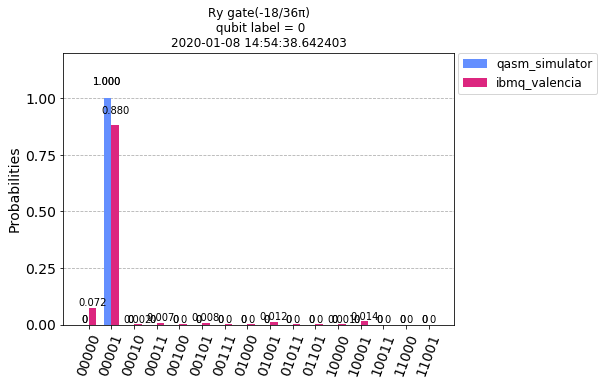

In [24]:
## define which circuit results
qubit = 0
angle = -18

## plot the results
plot_histogram([sim_list[qubit][angle+18], exp_list[qubit][angle+18]],
               legend=[simulator, device],
               title="Ry gate("+str(angle)+"/36π)\n qubit label = "
               +str(qubit)
               +"\n"+str(datetime.today()))

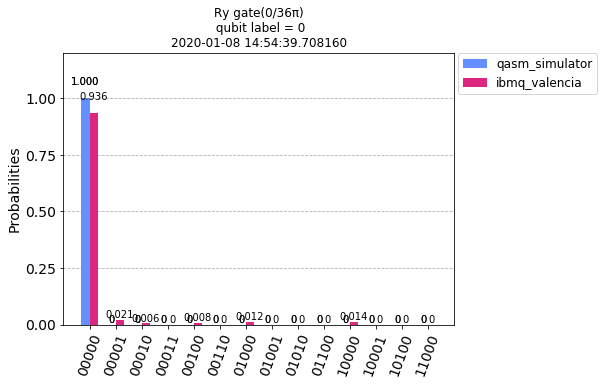

In [25]:
## define which circuit results
qubit = 0
angle = 0

## plot the results
plot_histogram([sim_list[qubit][angle+18], exp_list[qubit][angle+18]],
               legend=[simulator, device],
               title="Ry gate("+str(angle)+"/36π)\n qubit label = "
               +str(qubit)
               +"\n"+str(datetime.today()))

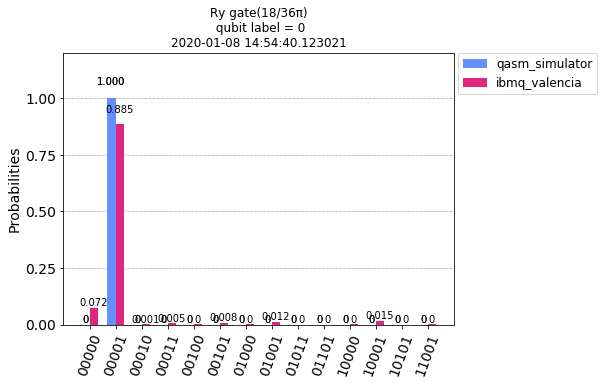

In [26]:
## define which circuit results
qubit = 0
angle = 18

## plot the results
plot_histogram([sim_list[qubit][angle+18], exp_list[qubit][angle+18]],
               legend=[simulator, device],
               title="Ry gate("+str(angle)+"/36π)\n qubit label = "
               +str(qubit)
               +"\n"+str(datetime.today()))

# Plot Ry quality curve

### Post processing of the date

In [27]:
## define the list to store the list of each qubit probability result
prob_sim = []
prob_exp = []

## repeat (num_qubits) times
for num_q in range(num_qubits):
    
    ## define the list to store the probability of qubit result for each qubit
    prob_qubit_sim = []
    prob_qubit_exp = []
    
    ## repeat (angle_div+1) time 
    for angle in range(angle_div+1):
        
        ## define the probability of qubit result
        prob_0_sim = sim_list[num_q][angle].get('00000', 0)/shots
        prob_0_exp = exp_list[num_q][angle].get('00000', 0)/shots
        
#         print(prob_0_sim)
        ## append the result of each angle
        prob_qubit_sim.append(prob_0_sim)
        prob_qubit_exp.append(prob_0_exp)
        
    prob_sim.append(prob_qubit_sim)
    prob_exp.append(prob_qubit_exp)

print(prob_sim)
print(prob_exp)

[[0.0, 0.00830078125, 0.0318603515625, 0.0684814453125, 0.1214599609375, 0.169189453125, 0.252685546875, 0.3258056640625, 0.4085693359375, 0.4996337890625, 0.5789794921875, 0.6676025390625, 0.7530517578125, 0.8135986328125, 0.880859375, 0.9298095703125, 0.968017578125, 0.9908447265625, 1.0, 0.99169921875, 0.9647216796875, 0.9310302734375, 0.886962890625, 0.8203125, 0.75048828125, 0.6678466796875, 0.5792236328125, 0.49755859375, 0.4080810546875, 0.3287353515625, 0.2529296875, 0.1763916015625, 0.12158203125, 0.072021484375, 0.032470703125, 0.0081787109375, 0.0], [0.0, 0.0084228515625, 0.02978515625, 0.06591796875, 0.117431640625, 0.18603515625, 0.252685546875, 0.3258056640625, 0.409912109375, 0.50732421875, 0.5869140625, 0.6630859375, 0.7606201171875, 0.823486328125, 0.8826904296875, 0.934814453125, 0.9691162109375, 0.99365234375, 1.0, 0.99169921875, 0.967529296875, 0.9315185546875, 0.883056640625, 0.8123779296875, 0.746337890625, 0.67431640625, 0.5899658203125, 0.5081787109375, 0.411499

### plot curve

In [28]:
colors = ["#FFEBEE", "#F48FB1", "#E57373", "#E53935", "#B71C1C"]

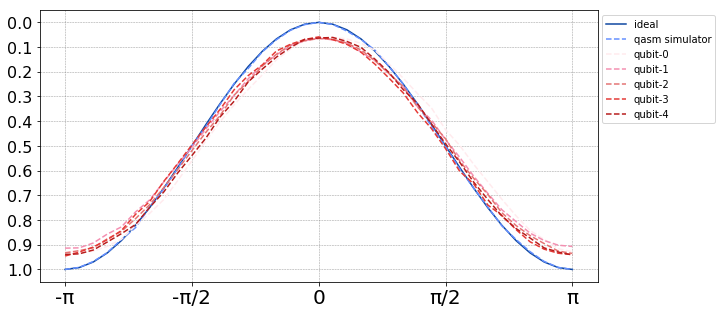

In [29]:
## set figure
fig,ax = plt.subplots(figsize=(10, 5))

## X axix
x_ax = np.linspace(-pi, pi, angle_div+1)

## set background color
# ax.patch.set_facecolor('black')

## set grid
ax.grid(which = "major", axis = "y", color = "gray", alpha = 0.8, linestyle = "--", linewidth = 0.5)
ax.grid(which = "major", axis = "x", color = "gray", alpha = 0.8, linestyle = "--", linewidth = 0.5)

## set axis
ax.set_yticks(np.linspace(0, 1, 11))
ax.set_yticklabels(["1.0", "0.9", "0.8", "0.7", "0.6", "0.5", "0.4", "0.3", "0.2", "0.1", "0.0"], fontsize=16)
ax.set_xticks(np.linspace(-pi, pi, 5))
ax.set_xticklabels(["-π", "-π/2", "0", "π/2", "π"], fontsize=20)

## plots the data
## ideal curve
plt.plot(x_ax, np.cos(x_ax)/2+0.5, 
         '-', 
         color= '#0D47A1', 
         label = "ideal")

## qasm simulator
plt.plot(x_ax, prob_sim[0], 
         '--', 
         color= '#648fff', 
         label = "qasm simulator")

for num_q in range(num_qubits):
    plt.plot(x_ax, prob_exp[num_q], 
             '--', 
             color= 
             colors[num_q], 
             label = "qubit-"+str(num_q))

    
## set legend
plt.legend(loc='upper right',bbox_to_anchor=(1.22, 1))

plt.show()


---
# Error mitigation

### Define measurement calibration

The calibration matrix 

[[9.32617188e-01 6.56738281e-02 8.58154297e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.84326172e-02 8.89282227e-01 1.83105469e-03 ... 6.10351562e-04
  0.00000000e+00 0.00000000e+00]
 [7.93457031e-03 1.09863281e-03 8.56323242e-01 ... 0.00000000e+00
  3.66210938e-04 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.44750977e-01
  2.31933594e-03 8.95996094e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.66210938e-04
  6.71020508e-01 6.38427734e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.85937500e-03
  1.50146484e-02 6.46728516e-01]]
Plot the calibration matrix (2D color grid plot)



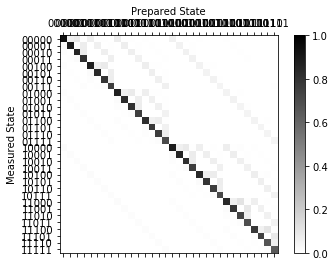

Average Measurement Fidelity: 0.792870 

The calibration matrix 

[[9.27734375e-01 7.05566406e-02 8.61816406e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.05078125e-02 8.83178711e-01 1.70898438e-03 ... 4.88281250e-04
  0.00000000e+00 0.00000000e+00]
 [9.03320312e-03 6.10351562e-04 8.55834961e-01 ... 0.00000000e+00
  3.66210938e-04 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.52197266e-01
  2.07519531e-03 8.88671875e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.66210938e-04
  6.85546875e-01 5.48095703e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.00488281e-03
  1.50146484e-02 6.57836914e-01]]
Plot the calibration matrix (2D color grid plot)



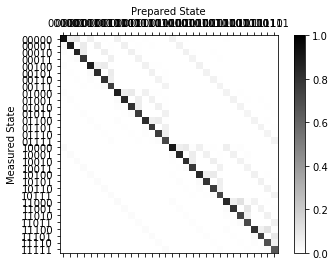

Average Measurement Fidelity: 0.797371 

The calibration matrix 

[[9.26879883e-01 6.99462891e-02 8.43505859e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.22167969e-02 8.83544922e-01 2.68554688e-03 ... 3.66210938e-04
  0.00000000e+00 0.00000000e+00]
 [8.17871094e-03 1.46484375e-03 8.59008789e-01 ... 0.00000000e+00
  1.22070312e-04 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.54882812e-01
  2.31933594e-03 8.89892578e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.88281250e-04
  6.84936523e-01 6.04248047e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.05664062e-03
  1.39160156e-02 6.55517578e-01]]
Plot the calibration matrix (2D color grid plot)



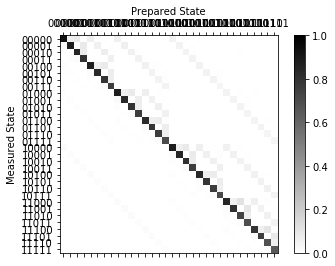

Average Measurement Fidelity: 0.796440 

The calibration matrix 

[[9.28222656e-01 6.68945312e-02 9.06982422e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.85546875e-02 8.87207031e-01 1.83105469e-03 ... 2.44140625e-04
  0.00000000e+00 0.00000000e+00]
 [1.09863281e-02 1.22070312e-03 8.51440430e-01 ... 0.00000000e+00
  2.44140625e-04 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.55615234e-01
  3.29589844e-03 9.20410156e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.32421875e-04
  6.89941406e-01 5.54199219e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.22558594e-03
  1.36718750e-02 6.66381836e-01]]
Plot the calibration matrix (2D color grid plot)



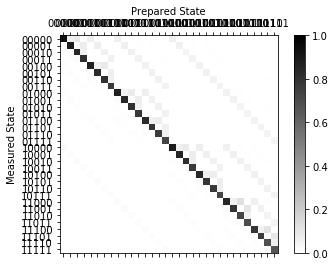

Average Measurement Fidelity: 0.800510 

The calibration matrix 

[[9.34204102e-01 6.60400391e-02 8.88671875e-02 ... 0.00000000e+00
  1.22070312e-04 0.00000000e+00]
 [1.84326172e-02 8.92578125e-01 1.70898438e-03 ... 6.10351562e-04
  0.00000000e+00 0.00000000e+00]
 [8.17871094e-03 1.09863281e-03 8.55102539e-01 ... 0.00000000e+00
  2.44140625e-04 1.22070312e-04]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.46337891e-01
  2.68554688e-03 8.88671875e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.44140625e-04
  6.97998047e-01 5.17578125e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.63867188e-03
  1.37939453e-02 6.66381836e-01]]
Plot the calibration matrix (2D color grid plot)



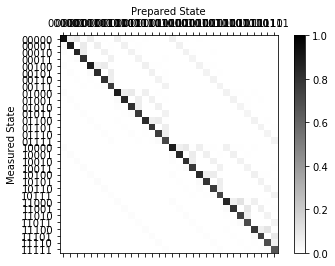

Average Measurement Fidelity: 0.800449 



In [30]:
meas_fitter_list = []

for result_cal_exp in result_cal_exp_list:
    
    ## define measurement fitter
    meas_fitter = CompleteMeasFitter(result_cal_exp, state_labels)
    meas_fitter_list.append(meas_fitter)
    
    print("The calibration matrix \n")
    print(meas_fitter.cal_matrix)

    ## Plot the calibration matrix
    print("Plot the calibration matrix (2D color grid plot)\n")
    meas_fitter.plot_calibration()

    ## The measurement fidelity
    print("Average Measurement Fidelity: %f" % meas_fitter.readout_fidelity(), "\n")

### Apply device calibration parameter to mitigate the result_exp

In [31]:
## define the list to store 
mitigated_list = []


## repeat (num_qubits) times
for result_exp, meas_fitter in zip(result_exp_list, meas_fitter_list):
    
    # Get the filter object
    meas_filter = meas_fitter.filter
    
    ## get measurement error mitigated result
    mitigated_results = meas_filter.apply(result_exp)
    
    mitigated_counts = []
    
    ## repeat (angle_div+1) times to apply error mitigation for each angle circuits
    for angle in range(angle_div+1):
        
        ## append the mitigated results to mitigated_counts list
        mitigated_counts.append(mitigated_results.get_counts(angle))
    
    ## Append mitigated_counts to mitigated_list
    mitigated_list.append(mitigated_counts)

### Show the mitigated counts

In [32]:
print(mitigated_list)

[[{'11100': 8.790169113426227e-17, '01110': 1.216691677963233e-15, '01001': 6.406457454275243, '01101': 3.3221914021081815, '01111': 1.467916229107996e-14, '00111': 0.8199531945660562, '00100': 0.973705123041894, '11000': 4.1736701443008395e-14, '01000': 6.380949913419032e-15, '00101': 4.936658309260609, '00001': 8104.7742654104095, '00000': 60.10281401707213, '00011': 5.050828123974012, '00110': 6.4151700444881055e-15, '01011': 2.0736236956521625, '11010': 6.092375952684859e-15, '00010': 3.539503269640983, '10110': 3.446001079973615e-16}, {'10100': 1.758142242902494e-15, '11100': 6.780448598420197e-14, '11111': 7.92605998195528e-14, '01110': 8.56971828569475e-14, '11110': 8.119210598983573e-14, '01101': 2.2820168064235924e-13, '01111': 1.912070762138951e-13, '00111': 4.5333474387593276e-13, '00100': 3.0117401628171336e-13, '11000': 2.5572968222198345e-14, '01000': 2.5102489531469985e-13, '00101': 1.1331668025790775e-12, '00001': 8176.640619734499, '00000': 11.738036191037082, '00011':

### Plot the mitigated counts

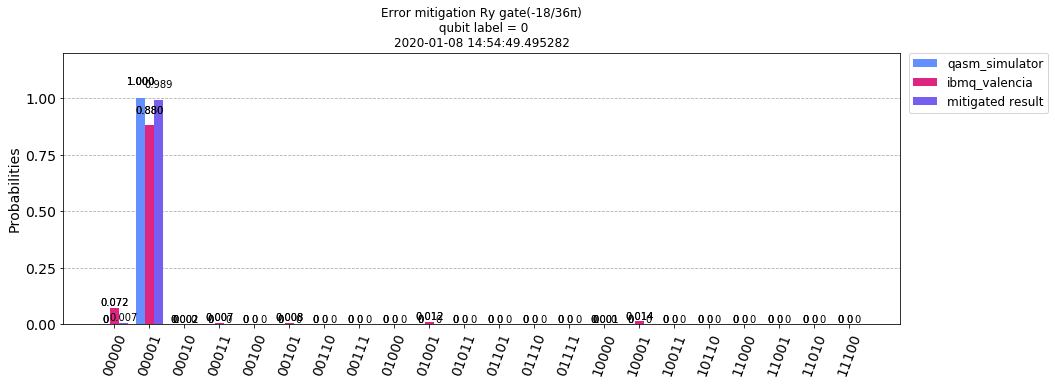

In [33]:
## define which circuit results
qubit = 0
angle = -18

## plot the results
plot_histogram([sim_list[qubit][angle+18], exp_list[qubit][angle+18], mitigated_list[qubit][angle+18]],
               legend=[simulator, device, "mitigated result"],
               title="Error mitigation Ry gate("+str(angle)+"/36π)\n qubit label = "
               +str(qubit)
               +"\n"+str(datetime.today()), 
               figsize= (15, 5)
              )

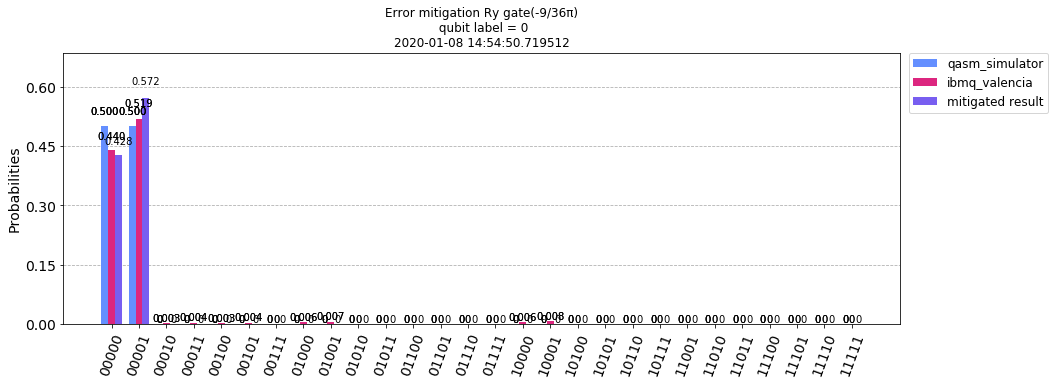

In [34]:
## define which circuit results
qubit = 0
angle = -9

## plot the results
plot_histogram([sim_list[qubit][angle+18], exp_list[qubit][angle+18], mitigated_list[qubit][angle+18]],
               legend=[simulator, device, "mitigated result"],
               title="Error mitigation Ry gate("+str(angle)+"/36π)\n qubit label = "
               +str(qubit)
               +"\n"+str(datetime.today()), 
               figsize= (15, 5)
              )

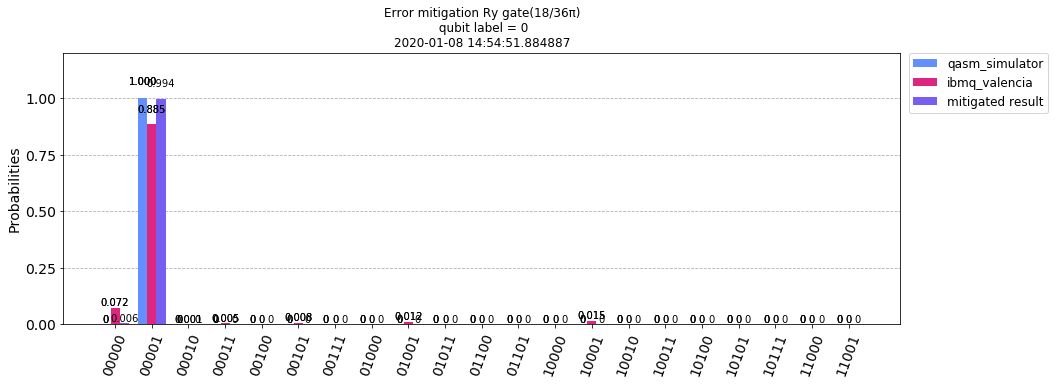

In [35]:
## define which circuit results
qubit = 0
angle = 18

## plot the results
plot_histogram([sim_list[qubit][angle+18], exp_list[qubit][angle+18], mitigated_list[qubit][angle+18]],
               legend=[simulator, device, "mitigated result"],
               title="Error mitigation Ry gate("+str(angle)+"/36π)\n qubit label = "
               +str(qubit)
               +"\n"+str(datetime.today()), 
               figsize= (15, 5)
              )

---
# Plot result (Error mitigation)

In [36]:
## define the list to store the list of each qubit probability result
prob_sim = []
prob_exp = []
prob_mitigated = []

## repeat (num_qubits) times
for num_q in range(num_qubits):
    
    ## define the list to store the probability of qubit result for each qubit
    prob_qubit_sim = []
    prob_qubit_exp = []
    prob_qubit_mitigated = []
    
    ## repeat (angle_div+1) time 
    for angle in range(angle_div+1):
        
        ## define the probability of qubit result
        prob_0_sim = sim_list[num_q][angle].get('00000', 0)/shots
        prob_0_exp = exp_list[num_q][angle].get('00000', 0)/shots
        prob_0_mitigated = mitigated_list[num_q][angle].get('00000', 0)/shots
        
        
#         print(prob_0_sim)
        ## append the result of each angle
        prob_qubit_sim.append(prob_0_sim)
        prob_qubit_exp.append(prob_0_exp)
        prob_qubit_mitigated.append(prob_0_mitigated)
        
    prob_sim.append(prob_qubit_sim)
    prob_exp.append(prob_qubit_exp)
    prob_mitigated.append(prob_qubit_mitigated)

print("prob_sim = \n", prob_sim)
print("prob_exp = \n", prob_exp)
print("prob_mitigated = \n", prob_mitigated)

prob_sim = 
 [[0.0, 0.00830078125, 0.0318603515625, 0.0684814453125, 0.1214599609375, 0.169189453125, 0.252685546875, 0.3258056640625, 0.4085693359375, 0.4996337890625, 0.5789794921875, 0.6676025390625, 0.7530517578125, 0.8135986328125, 0.880859375, 0.9298095703125, 0.968017578125, 0.9908447265625, 1.0, 0.99169921875, 0.9647216796875, 0.9310302734375, 0.886962890625, 0.8203125, 0.75048828125, 0.6678466796875, 0.5792236328125, 0.49755859375, 0.4080810546875, 0.3287353515625, 0.2529296875, 0.1763916015625, 0.12158203125, 0.072021484375, 0.032470703125, 0.0081787109375, 0.0], [0.0, 0.0084228515625, 0.02978515625, 0.06591796875, 0.117431640625, 0.18603515625, 0.252685546875, 0.3258056640625, 0.409912109375, 0.50732421875, 0.5869140625, 0.6630859375, 0.7606201171875, 0.823486328125, 0.8826904296875, 0.934814453125, 0.9691162109375, 0.99365234375, 1.0, 0.99169921875, 0.967529296875, 0.9315185546875, 0.883056640625, 0.8123779296875, 0.746337890625, 0.67431640625, 0.5899658203125, 0.5081787109

In [2]:
## Import date, csv tools
from datetime import datetime

## Import pi from numpy module
from numpy import pi
import numpy as np

## Import plot tools
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
prob_sim = [[0.0, 0.00830078125, 0.0318603515625, 0.0684814453125, 0.1214599609375, 0.169189453125, 0.252685546875, 0.3258056640625, 0.4085693359375, 0.4996337890625, 0.5789794921875, 0.6676025390625, 0.7530517578125, 0.8135986328125, 0.880859375, 0.9298095703125, 0.968017578125, 0.9908447265625, 1.0, 0.99169921875, 0.9647216796875, 0.9310302734375, 0.886962890625, 0.8203125, 0.75048828125, 0.6678466796875, 0.5792236328125, 0.49755859375, 0.4080810546875, 0.3287353515625, 0.2529296875, 0.1763916015625, 0.12158203125, 0.072021484375, 0.032470703125, 0.0081787109375, 0.0], [0.0, 0.0084228515625, 0.02978515625, 0.06591796875, 0.117431640625, 0.18603515625, 0.252685546875, 0.3258056640625, 0.409912109375, 0.50732421875, 0.5869140625, 0.6630859375, 0.7606201171875, 0.823486328125, 0.8826904296875, 0.934814453125, 0.9691162109375, 0.99365234375, 1.0, 0.99169921875, 0.967529296875, 0.9315185546875, 0.883056640625, 0.8123779296875, 0.746337890625, 0.67431640625, 0.5899658203125, 0.5081787109375, 0.4114990234375, 0.3310546875, 0.2484130859375, 0.1844482421875, 0.109375, 0.0654296875, 0.0303955078125, 0.00634765625, 0.0], [0.0, 0.00732421875, 0.03271484375, 0.064208984375, 0.1204833984375, 0.169921875, 0.2506103515625, 0.325439453125, 0.4114990234375, 0.4881591796875, 0.580078125, 0.6756591796875, 0.7493896484375, 0.82177734375, 0.8839111328125, 0.93310546875, 0.9730224609375, 0.9920654296875, 1.0, 0.9937744140625, 0.9671630859375, 0.930419921875, 0.8807373046875, 0.8193359375, 0.755859375, 0.6817626953125, 0.5894775390625, 0.49560546875, 0.4169921875, 0.3272705078125, 0.2491455078125, 0.1827392578125, 0.1126708984375, 0.076416015625, 0.029296875, 0.0098876953125, 0.0], [0.0, 0.00732421875, 0.0306396484375, 0.061279296875, 0.11767578125, 0.1861572265625, 0.2498779296875, 0.3218994140625, 0.40869140625, 0.506103515625, 0.591064453125, 0.67626953125, 0.749755859375, 0.8270263671875, 0.8851318359375, 0.9381103515625, 0.9700927734375, 0.993896484375, 1.0, 0.9921875, 0.969970703125, 0.927978515625, 0.87890625, 0.8238525390625, 0.7545166015625, 0.67333984375, 0.5823974609375, 0.4930419921875, 0.416748046875, 0.3294677734375, 0.254638671875, 0.179931640625, 0.1141357421875, 0.064697265625, 0.0302734375, 0.0074462890625, 0.0], [0.0, 0.007080078125, 0.0328369140625, 0.060302734375, 0.11572265625, 0.177978515625, 0.2464599609375, 0.3203125, 0.4158935546875, 0.4931640625, 0.5889892578125, 0.6729736328125, 0.7489013671875, 0.8267822265625, 0.8780517578125, 0.9361572265625, 0.9693603515625, 0.991943359375, 1.0, 0.9925537109375, 0.970703125, 0.93212890625, 0.8812255859375, 0.8232421875, 0.75439453125, 0.6683349609375, 0.5833740234375, 0.5069580078125, 0.4130859375, 0.337646484375, 0.2509765625, 0.1802978515625, 0.114990234375, 0.066650390625, 0.029052734375, 0.0068359375, 0.0]]
prob_exp = [[0.072021484375, 0.068115234375, 0.07421875, 0.0936279296875, 0.12255859375, 0.177490234375, 0.2269287109375, 0.2825927734375, 0.35986328125, 0.439697265625, 0.520263671875, 0.597412109375, 0.6661376953125, 0.728759765625, 0.7877197265625, 0.848388671875, 0.891845703125, 0.92822265625, 0.9359130859375, 0.939208984375, 0.932861328125, 0.9151611328125, 0.8865966796875, 0.8306884765625, 0.77392578125, 0.7122802734375, 0.65380859375, 0.5657958984375, 0.5023193359375, 0.42529296875, 0.35498046875, 0.2840576171875, 0.2174072265625, 0.1580810546875, 0.121337890625, 0.083984375, 0.0716552734375], [0.086181640625, 0.08740234375, 0.10693359375, 0.1431884765625, 0.1722412109375, 0.232666015625, 0.28125, 0.3538818359375, 0.426513671875, 0.4942626953125, 0.5687255859375, 0.6397705078125, 0.7047119140625, 0.7718505859375, 0.826416015625, 0.868408203125, 0.9056396484375, 0.925537109375, 0.9359130859375, 0.92919921875, 0.9166259765625, 0.880126953125, 0.84521484375, 0.7913818359375, 0.7401123046875, 0.659912109375, 0.60498046875, 0.5255126953125, 0.4542236328125, 0.3773193359375, 0.3079833984375, 0.241455078125, 0.194091796875, 0.14697265625, 0.1170654296875, 0.09814453125, 0.093017578125], [0.06689453125, 0.0760498046875, 0.087646484375, 0.1241455078125, 0.1539306640625, 0.2054443359375, 0.2618408203125, 0.3311767578125, 0.40478515625, 0.4808349609375, 0.555419921875, 0.623046875, 0.7056884765625, 0.7606201171875, 0.823486328125, 0.870849609375, 0.9088134765625, 0.925537109375, 0.9346923828125, 0.9317626953125, 0.916015625, 0.8885498046875, 0.84423828125, 0.792236328125, 0.739501953125, 0.65869140625, 0.5953369140625, 0.52880859375, 0.4395751953125, 0.3687744140625, 0.3038330078125, 0.2293701171875, 0.177978515625, 0.136962890625, 0.104736328125, 0.0743408203125, 0.06494140625], [0.0543212890625, 0.0701904296875, 0.0906982421875, 0.120361328125, 0.157470703125, 0.222900390625, 0.2745361328125, 0.3558349609375, 0.4288330078125, 0.5037841796875, 0.5771484375, 0.647705078125, 0.727294921875, 0.7847900390625, 0.8280029296875, 0.884033203125, 0.9114990234375, 0.9305419921875, 0.9412841796875, 0.929931640625, 0.910888671875, 0.87939453125, 0.830322265625, 0.773681640625, 0.71435546875, 0.6356201171875, 0.5703125, 0.4891357421875, 0.3978271484375, 0.3463134765625, 0.2608642578125, 0.218505859375, 0.16162109375, 0.1119384765625, 0.08203125, 0.0655517578125, 0.06005859375], [0.0606689453125, 0.0631103515625, 0.07861328125, 0.1112060546875, 0.144775390625, 0.181884765625, 0.2508544921875, 0.3133544921875, 0.390869140625, 0.4609375, 0.5321044921875, 0.6173095703125, 0.6810302734375, 0.75927734375, 0.81103515625, 0.859375, 0.8983154296875, 0.9310302734375, 0.9365234375, 0.9388427734375, 0.9228515625, 0.89892578125, 0.8505859375, 0.7962646484375, 0.727783203125, 0.6717529296875, 0.589111328125, 0.5086669921875, 0.4344482421875, 0.353271484375, 0.2830810546875, 0.2161865234375, 0.165771484375, 0.127197265625, 0.087158203125, 0.0704345703125, 0.0584716796875]]
prob_mitigated = [[0.007336769289193375, 0.0014328657459762063, 0.00820879895892795, 0.031055633867267392, 0.065344147463716, 0.1278970342358226, 0.1853459649955991, 0.24981576821564908, 0.3385176348197649, 0.42824923917230595, 0.5223565371487868, 0.611322776788346, 0.6890492575098135, 0.7609812397682459, 0.8317341471380164, 0.8991552371281588, 0.9488741304203078, 0.987461587532163, 0.9999999999999823, 0.9999999999999934, 0.9978789428460018, 0.9751458270871387, 0.9423254784969882, 0.8794247195153014, 0.8163579886732754, 0.7433751423011893, 0.674743789658876, 0.5732227143563494, 0.5003876143334873, 0.4125153133757875, 0.33117786852172937, 0.24817031666945838, 0.17496627932456219, 0.10656541099335351, 0.060635366555182715, 0.020297113041374108, 0.00583236765154843], [3.975158268422708e-16, 0.0, 0.02352194452510585, 0.06274995486928314, 0.1021001075404037, 0.17070403863721192, 0.22794376464603383, 0.31581119004548225, 0.4004085389331603, 0.4801287864989925, 0.5695877479172363, 0.6532696239455514, 0.7321366533236168, 0.806608772623363, 0.8741590244855133, 0.926417792376911, 0.9681581375579611, 0.9945888950844575, 1.0, 0.9977830865360128, 0.9811242684352262, 0.9424211203126895, 0.8973226017636892, 0.8322933919377702, 0.7727581843393357, 0.6773903434530342, 0.6122229312674567, 0.5204415607394204, 0.43259993614865405, 0.34440253634097406, 0.2605969085404138, 0.1828982192104827, 0.12324977772162901, 0.07034121264425398, 0.033946926819278724, 0.012052005606994237, 0.006431751968735702], [0.0011827257433334297, 0.009050090002622723, 0.022874297026891144, 0.06475427529006228, 0.0975959915140467, 0.15936277996059933, 0.22671030543897253, 0.3051495968981832, 0.39026393325573655, 0.48061453200926046, 0.5642761437698836, 0.6430623344395434, 0.7379524198361372, 0.8022921214946066, 0.8757685140101199, 0.9293234115348332, 0.9722117289831962, 0.9930690301223225, 0.999999999999984, 1.0, 0.9811036003957542, 0.9503878613599493, 0.8996291614180659, 0.8396380865759909, 0.7769928970227163, 0.6822781244586892, 0.6101071264918327, 0.5347440673860935, 0.43040817718106006, 0.348278958866532, 0.2716334091402611, 0.18997272278903063, 0.12714841236518568, 0.08156687680014545, 0.043652430403066045, 0.0075959048029713636, 0.0], [5.751548622797959e-13, 0.005631221380523037, 0.027186613925182013, 0.06281451973770003, 0.10486480204279089, 0.18108475826161358, 0.2414793833174883, 0.33376711080004645, 0.4164023015589506, 0.5040600148915577, 0.5890621789906125, 0.6729318143349762, 0.7612143959468657, 0.8298732509341151, 0.8805462913226298, 0.9425197239083237, 0.9775961894634498, 0.9958398918045821, 0.9999999999997984, 0.9967021257642545, 0.975048049675952, 0.9381557168029797, 0.8812533509574129, 0.8171868944198808, 0.7472189371297572, 0.6576293209554748, 0.5798921861897366, 0.489062098461153, 0.38310992394558296, 0.3220718490981377, 0.22438153894194024, 0.17434449594455798, 0.10839757797902357, 0.05335695441988781, 0.015220354884508867, 8.180257948459098e-16, 0.0], [0.0014770151275046936, 0.00246196141807727, 0.019100822016197103, 0.05597193056225401, 0.09450435629974581, 0.13416340525432077, 0.21487945619046506, 0.2866974160773233, 0.3754735682247533, 0.4549249473052991, 0.5388156564258959, 0.6346173561454307, 0.709324129236351, 0.7976086968891614, 0.8565249468615411, 0.912029108361145, 0.9577238192837658, 0.9933182647075274, 0.9999999999999983, 0.9999999999999952, 0.9831251741378005, 0.9538540290554248, 0.9012114488262917, 0.8380589467491868, 0.761674108723723, 0.6954285376260718, 0.6012499016147572, 0.5100596885179535, 0.42497393288600854, 0.33082928560816205, 0.2551577941856175, 0.1759519044517457, 0.11633322932633704, 0.07385229958441192, 0.027636462454696024, 0.009472195858698743, 0.0]]
angle_div = 36
num_qubits = 5

### Plots data with mitigated result

In [4]:
# colors = ["#FFEBEE", "#F48FB1", "#E57373", "#E53935", "#B71C1C"]
colors = ["#ff9999", "#ff6666", "#ff3333", "#e63900", "#b32d00"]
colors_mitigated = ["#9575CD", "#673AB7", "#311B92", "#6200EA", "#1A237E"]

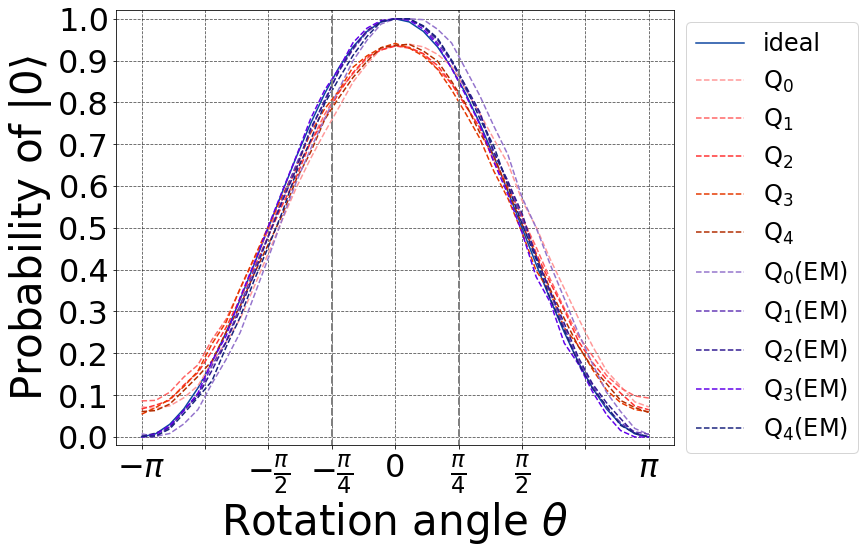

In [6]:
## X axix
x_ax = np.linspace(-pi, pi, angle_div+1)

######################## device data and Mitigation result #######################
fig,ax = plt.subplots(figsize=(10, 8))


## set background color
# ax.patch.set_facecolor('black')

## set grid
ax.grid(which = "major", axis = "y", color = "#262626", alpha = 0.8, linestyle = "--", linewidth = 0.8)
ax.grid(which = "major", axis = "x", color = "#262626", alpha = 0.8, linestyle = "--", linewidth = 0.8)

## set axis
plt.ylabel("Probability of "+r"$\vert0\rangle$" , fontsize = 42)
ax.set_yticks(np.linspace(0, 1, 11))
ax.set_yticklabels(["0.0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"], 
                   fontsize=32)
plt.xlabel("Rotation angle "+r"$\theta$", fontsize = 42)
ax.set_xticks(np.linspace(-pi, pi, 9))
ax.set_xticklabels([r"$-\pi$", "", r"$-\frac{\pi}{2}$", r"$-\frac{\pi}{4}$", "0", r"$\frac{\pi}{4}$",  r"$\frac{\pi}{2}$", "", "$\pi$"], fontsize=32)


## plots the data
## ideal curve
plt.plot(x_ax, np.cos(x_ax)/2+0.5, 
         '-', 
         color= '#0D47A1', 
         label = "ideal")

## qasm simulator
# plt.plot(x_ax, prob_sim[0], 
#          '--', 
#          color= '#648fff', 
#          label = "qasm simulator")

## device result
for num_q in range(num_qubits):
    plt.plot(x_ax, prob_exp[num_q], 
             '--', 
             color= colors[num_q], 
             label = "Q$_"+str(num_q)+"$"
            )
    
## mitigated result
for num_q in range(num_qubits):
    plt.plot(x_ax, prob_mitigated[num_q], 
             '--', 
             color= colors_mitigated[num_q], 
             label = "Q$_"+str(num_q)+"$(EM)"
            )

plt.plot([-pi/4, -pi/4], [-0.1, 1.1], 
         '--', 
         color= "gray", 
        linewidth=2)

plt.plot([pi/4, pi/4], [-0.1, 1.1], 
         '--', 
         color= "gray", 
        linewidth=2)

plt.ylim(-0.02, 1.02)

## set legend
plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1), fontsize=24)

plt.savefig("Ry_ourense_20200108.png", dpi=200, bbox_inches="tight", pad_inches=0.1)
plt.show()